# Entrenamiento modelos

### Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer  

# 0. Preparar todos los DF

In [2]:
df_modelar = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\dataset_entrenamiento_lag1.xlsx")
df_modelar

,AÑO,MES_NUM,LATITUD,LONGITUD,SHAPE_AREA,PRECIO M2,EURIBOR_lag12,VARIACIÓN ANUAL_lag12,PRECIO M2_lag12,TRANSACCIONES_CM_lag12,...,DIST_Moratalaz,DIST_Puente De Vallecas,DIST_Retiro,DIST_Salamanca,DIST_San Blas-Canillejas,DIST_Tetuan,DIST_Usera,DIST_Vicalvaro,DIST_Villa De Vallecas,DIST_Villaverde
0,2008,11,40.40021,-3.69618,6.462176e+06,3714,0.04498,0.0125,4000,6058,...,False,False,False,False,False,False,False,False,False,False
1,2008,12,40.40021,-3.69618,6.462176e+06,3667,0.04498,0.0125,4000,4577,...,False,False,False,False,False,False,False,False,False,False
2,2009,1,40.40021,-3.69618,6.462176e+06,3782,0.04498,0.0125,4000,6123,...,False,False,False,False,False,False,False,False,False,False
3,2009,2,40.40021,-3.69618,6.462176e+06,3722,0.04349,0.0125,3824,5964,...,False,False,False,False,False,False,False,False,False,False
4,2009,3,40.40021,-3.69618,6.462176e+06,3722,0.04498,0.0125,4000,5525,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161,2024,12,40.37400,-3.70000,2.019432e+07,2252,0.03679,0.0630,1963,4048,...,False,False,False,False,False,False,False,False,False,True
4162,2025,1,40.37400,-3.70000,2.019432e+07,2207,0.03609,0.0680,1982,6209,...,False,False,False,False,False,False,False,False,False,True
4163,2025,2,40.37400,-3.70000,2.019432e+07,2254,0.03671,0.0580,1977,6336,...,False,False,False,False,False,False,False,False,False,True
4164,2025,3,40.37400,-3.70000,2.019432e+07,2294,0.03716,0.0670,1988,5924,...,False,False,False,False,False,False,False,False,False,True


In [3]:
df_prediccion = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\dataset_prediccion.xlsx")
df_prediccion

,AÑO,MES_NUM,LATITUD,LONGITUD,SHAPE_AREA,PRECIO M2,EURIBOR_lag12,VARIACIÓN ANUAL_lag12,PRECIO M2_lag12,TRANSACCIONES_CM_lag12,...,DIST_Moratalaz,DIST_Puente De Vallecas,DIST_Retiro,DIST_Salamanca,DIST_San Blas-Canillejas,DIST_Tetuan,DIST_Usera,DIST_Vicalvaro,DIST_Villa De Vallecas,DIST_Villaverde
0,2025,7,40.40021,-3.69618,6.462176e+06,NaN,0.03526,0.114,4957,6657,...,False,False,False,False,False,False,False,False,False,False
1,2025,8,40.40021,-3.69618,6.462176e+06,NaN,0.03169,0.114,4998,5423,...,False,False,False,False,False,False,False,False,False,False
2,2025,9,40.40021,-3.69618,6.462176e+06,NaN,0.02940,0.114,4999,7380,...,False,False,False,False,False,False,False,False,False,False
3,2025,10,40.40021,-3.69618,6.462176e+06,NaN,0.02686,0.126,5079,7380,...,False,False,False,False,False,False,False,False,False,False
4,2025,11,40.40021,-3.69618,6.462176e+06,NaN,0.02506,0.125,5062,6876,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2026,2,40.37400,-3.70000,2.019432e+07,NaN,0.02402,0.140,2254,6963,...,False,False,False,False,False,False,False,False,False,True
248,2026,3,40.37400,-3.70000,2.019432e+07,NaN,0.02398,0.154,2294,7380,...,False,False,False,False,False,False,False,False,False,True
249,2026,4,40.37400,-3.70000,2.019432e+07,NaN,0.02143,0.155,2362,6604,...,False,False,False,False,False,False,False,False,False,True
250,2026,5,40.37400,-3.70000,2.019432e+07,NaN,0.02143,0.155,2362,6604,...,False,False,False,False,False,False,False,False,False,True


In [4]:
df_modelar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4166 entries, 0 to 4165
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          4166 non-null   int64  
 1   MES_NUM                      4166 non-null   int64  
 2   LATITUD                      4166 non-null   float64
 3   LONGITUD                     4166 non-null   float64
 4   SHAPE_AREA                   4166 non-null   float64
 5   PRECIO M2                    4166 non-null   int64  
 6   EURIBOR_lag12                4166 non-null   float64
 7   VARIACIÓN ANUAL_lag12        4166 non-null   float64
 8   PRECIO M2_lag12              4166 non-null   int64  
 9   TRANSACCIONES_CM_lag12       4166 non-null   int64  
 10  INDICE_PRECIO_lag12          4166 non-null   float64
 11  TOTAL_HIPOTECAS_lag12        4166 non-null   int64  
 12  POBLACION_ACTIVA_lag12       4166 non-null   float64
 13  POBLACION_lag12   

In [5]:
## Ordenar por orden cronológico

df_modelar = df_modelar.sort_values(['AÑO','MES_NUM']).reset_index(drop=True)
df_modelar

,AÑO,MES_NUM,LATITUD,LONGITUD,SHAPE_AREA,PRECIO M2,EURIBOR_lag12,VARIACIÓN ANUAL_lag12,PRECIO M2_lag12,TRANSACCIONES_CM_lag12,...,DIST_Moratalaz,DIST_Puente De Vallecas,DIST_Retiro,DIST_Salamanca,DIST_San Blas-Canillejas,DIST_Tetuan,DIST_Usera,DIST_Vicalvaro,DIST_Villa De Vallecas,DIST_Villaverde
0,2008,5,40.39094,-3.72420,1.404832e+07,2894,0.04373,-0.0040,3121,7380,...,False,False,False,False,False,False,False,False,False,False
1,2008,5,40.45975,-3.69750,5.374725e+06,3702,0.04373,0.0105,3796,7380,...,False,False,False,False,False,True,False,False,False,False
2,2008,6,40.39094,-3.72420,1.404832e+07,2919,0.04498,-0.0040,3173,7380,...,False,False,False,False,False,False,False,False,False,False
3,2008,6,40.41831,-3.70275,5.228246e+06,4388,0.04498,0.0220,4702,7380,...,False,False,False,False,False,False,False,False,False,False
4,2008,6,40.45975,-3.69750,5.374725e+06,3708,0.04498,0.0105,3857,7380,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161,2025,6,40.43893,-3.61537,2.228989e+07,3611,0.03650,0.0780,2996,6698,...,False,False,False,False,True,False,False,False,False,False
4162,2025,6,40.45975,-3.69750,5.374725e+06,5430,0.03650,0.1030,4536,6698,...,False,False,False,False,False,True,False,False,False,False
4163,2025,6,40.38866,-3.70035,7.777717e+06,2997,0.03650,0.0970,2497,6698,...,False,False,False,False,False,False,True,False,False,False
4164,2025,6,40.39400,-3.60288,3.526274e+07,3426,0.03650,0.0020,2947,6698,...,False,False,False,False,False,False,False,True,False,False


### Pasar a numéricas las variables booleanas

In [6]:
# Seleccionar directamente todas las columnas booleanas
bool_cols = df_modelar.select_dtypes(include=['bool']).columns

# Convertir esas columnas a enteros 0/1
df_modelar[bool_cols] = df_modelar[bool_cols].astype('int32')

# Verificar
print(df_modelar[bool_cols].head())


   DIST_Arganzuela  DIST_Barajas  DIST_Carabanchel  DIST_Centro  \
0                0             0                 1            0   
1                0             0                 0            0   
2                0             0                 1            0   
3                0             0                 0            1   
4                0             0                 0            0   

   DIST_Chamartin  DIST_Chamberi  DIST_Ciudad Lineal  \
0               0              0                   0   
1               0              0                   0   
2               0              0                   0   
3               0              0                   0   
4               0              0                   0   

   DIST_Fuencarral-El Pardo  DIST_Hortaleza  DIST_Latina  ...  DIST_Moratalaz  \
0                         0               0            0  ...               0   
1                         0               0            0  ...               0   
2                

In [7]:
# Lo mismo con el dataset de prediccion
# Seleccionar directamente todas las columnas booleanas
bool_cols = df_prediccion.select_dtypes(include=['bool']).columns

# Convertir esas columnas a enteros 0/1
df_prediccion[bool_cols] = df_prediccion[bool_cols].astype('int32')

# Verificar
print(df_prediccion[bool_cols].head())

   DIST_Arganzuela  DIST_Barajas  DIST_Carabanchel  DIST_Centro  \
0                1             0                 0            0   
1                1             0                 0            0   
2                1             0                 0            0   
3                1             0                 0            0   
4                1             0                 0            0   

   DIST_Chamartin  DIST_Chamberi  DIST_Ciudad Lineal  \
0               0              0                   0   
1               0              0                   0   
2               0              0                   0   
3               0              0                   0   
4               0              0                   0   

   DIST_Fuencarral-El Pardo  DIST_Hortaleza  DIST_Latina  ...  DIST_Moratalaz  \
0                         0               0            0  ...               0   
1                         0               0            0  ...               0   
2                

### Hacer split de train y test por orden cronológico

In [8]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_bool_dtype

# 1) Variable objetivo
TARGET = "PRECIO M2"
df_modelar[TARGET] = df_modelar[TARGET].astype(float)

# 2) Columnas de entrada: numéricas (cualquier int/float) + booleanas
feat_cols = [
    c for c in df_modelar.columns
    if c != TARGET and (is_numeric_dtype(df_modelar[c]) or is_bool_dtype(df_modelar[c]))
]
# Alternativa equivalente:
# feat_cols = [c for c in df_modelar.select_dtypes(include=[np.number, "bool"]).columns if c != TARGET]

# 3) Construir X, y
X = df_modelar[feat_cols].copy()
y = df_modelar[TARGET].copy()

# 4) Split temporal 80–20 (dataset ya ordenado)
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"Tamaño train: {X_train.shape}, Tamaño test: {X_test.shape}")
print("Booleans preservados:", list(X.select_dtypes(include=['bool']).columns))
print("Ints (incl. dummies 0/1):", list(X.select_dtypes(include=['int32','int64']).columns)[:10], "...")


Tamaño train: (3332, 38), Tamaño test: (834, 38)
Booleans preservados: []
Ints (incl. dummies 0/1): ['AÑO', 'MES_NUM', 'PRECIO M2_lag12', 'TRANSACCIONES_CM_lag12', 'TOTAL_HIPOTECAS_lag12', 'VIVIENDAS_COMPRAVENTA_lag12', 'TRANSACCIONES_SUELO_lag12', 'DIST_Arganzuela', 'DIST_Barajas', 'DIST_Carabanchel'] ...


Separa los primeros años (80%) como train.

Deja los últimos años (20%) como test.

Respeta la cronología y simula un escenario real: entrenar con el pasado y predices el futuro.

In [9]:
X_train

,AÑO,MES_NUM,LATITUD,LONGITUD,SHAPE_AREA,EURIBOR_lag12,VARIACIÓN ANUAL_lag12,PRECIO M2_lag12,TRANSACCIONES_CM_lag12,INDICE_PRECIO_lag12,...,DIST_Moratalaz,DIST_Puente De Vallecas,DIST_Retiro,DIST_Salamanca,DIST_San Blas-Canillejas,DIST_Tetuan,DIST_Usera,DIST_Vicalvaro,DIST_Villa De Vallecas,DIST_Villaverde
0,2008,5,40.39094,-3.72420,1.404832e+07,0.04373,-0.0040,3121,7380,160.67,...,0,0,0,0,0,0,0,0,0,0
1,2008,5,40.45975,-3.69750,5.374725e+06,0.04373,0.0105,3796,7380,160.67,...,0,0,0,0,0,1,0,0,0,0
2,2008,6,40.39094,-3.72420,1.404832e+07,0.04498,-0.0040,3173,7380,160.67,...,0,0,0,0,0,0,0,0,0,0
3,2008,6,40.41831,-3.70275,5.228246e+06,0.04498,0.0220,4702,7380,160.67,...,0,0,0,0,0,0,0,0,0,0
4,2008,6,40.45975,-3.69750,5.374725e+06,0.04498,0.0105,3857,7380,160.67,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,2022,2,40.37400,-3.70000,2.019432e+07,-0.00484,-0.0160,1738,6656,143.93,...,0,0,0,0,0,0,0,0,0,1
3328,2022,3,40.40021,-3.69618,6.462176e+06,-0.00484,-0.0110,3978,7380,143.93,...,0,0,0,0,0,0,0,0,0,0
3329,2022,3,40.47366,-3.60288,4.171634e+07,-0.00484,0.0190,3239,7380,143.93,...,0,0,0,0,0,0,0,0,0,0
3330,2022,3,40.39094,-3.72420,1.404832e+07,-0.00484,-0.0380,2127,7380,143.93,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train.shape

(3332, 38)

In [11]:
X_test

,AÑO,MES_NUM,LATITUD,LONGITUD,SHAPE_AREA,EURIBOR_lag12,VARIACIÓN ANUAL_lag12,PRECIO M2_lag12,TRANSACCIONES_CM_lag12,INDICE_PRECIO_lag12,...,DIST_Moratalaz,DIST_Puente De Vallecas,DIST_Retiro,DIST_Salamanca,DIST_San Blas-Canillejas,DIST_Tetuan,DIST_Usera,DIST_Vicalvaro,DIST_Villa De Vallecas,DIST_Villaverde
3332,2022,3,40.46206,-3.67660,9.175482e+06,-0.00484,-0.031,4988,7380,143.93,...,0,0,0,0,0,0,0,0,0,0
3333,2022,3,40.43404,-3.70379,5.228246e+06,-0.00484,-0.018,5222,7380,143.93,...,0,0,0,0,0,0,0,0,0,0
3334,2022,3,40.44505,-3.65132,1.142568e+07,-0.00484,-0.018,2951,7380,143.93,...,0,0,0,0,0,0,0,0,0,0
3335,2022,3,40.47444,-3.73140,5.145375e+07,-0.00484,-0.011,3531,7380,143.93,...,0,0,0,0,0,0,0,0,0,0
3336,2022,3,40.47444,-3.64110,2.762398e+07,-0.00484,-0.033,3623,7380,143.93,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161,2025,6,40.43893,-3.61537,2.228989e+07,0.03650,0.078,2996,6698,174.54,...,0,0,0,0,1,0,0,0,0,0
4162,2025,6,40.45975,-3.69750,5.374725e+06,0.03650,0.103,4536,6698,174.54,...,0,0,0,0,0,1,0,0,0,0
4163,2025,6,40.38866,-3.70035,7.777717e+06,0.03650,0.097,2497,6698,174.54,...,0,0,0,0,0,0,1,0,0,0
4164,2025,6,40.39400,-3.60288,3.526274e+07,0.03650,0.002,2947,6698,174.54,...,0,0,0,0,0,0,0,1,0,0


In [12]:
X_test.shape

(834, 38)

In [13]:
y_train

0       2894.0
1       3702.0
2       2919.0
3       4388.0
4       3708.0
         ...  
3327    1713.0
3328    4136.0
3329    3331.0
3330    2185.0
3331    4994.0
Name: PRECIO M2, Length: 3332, dtype: float64

In [14]:
y_train.shape

(3332,)

In [15]:
y_test

3332    5218.0
3333    5473.0
3334    3039.0
3335    3738.0
3336    3946.0
         ...  
4161    3611.0
4162    5430.0
4163    2997.0
4164    3426.0
4165    3275.0
Name: PRECIO M2, Length: 834, dtype: float64

In [16]:
y_test.shape

(834,)

In [17]:
df_modelar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4166 entries, 0 to 4165
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          4166 non-null   int64  
 1   MES_NUM                      4166 non-null   int64  
 2   LATITUD                      4166 non-null   float64
 3   LONGITUD                     4166 non-null   float64
 4   SHAPE_AREA                   4166 non-null   float64
 5   PRECIO M2                    4166 non-null   float64
 6   EURIBOR_lag12                4166 non-null   float64
 7   VARIACIÓN ANUAL_lag12        4166 non-null   float64
 8   PRECIO M2_lag12              4166 non-null   int64  
 9   TRANSACCIONES_CM_lag12       4166 non-null   int64  
 10  INDICE_PRECIO_lag12          4166 non-null   float64
 11  TOTAL_HIPOTECAS_lag12        4166 non-null   int64  
 12  POBLACION_ACTIVA_lag12       4166 non-null   float64
 13  POBLACION_lag12   

In [18]:
# Número de nulos por columna
df_modelar.isna().sum()

AÑO                            0
MES_NUM                        0
LATITUD                        0
LONGITUD                       0
SHAPE_AREA                     0
PRECIO M2                      0
EURIBOR_lag12                  0
VARIACIÓN ANUAL_lag12          0
PRECIO M2_lag12                0
TRANSACCIONES_CM_lag12         0
INDICE_PRECIO_lag12            0
TOTAL_HIPOTECAS_lag12          0
POBLACION_ACTIVA_lag12         0
POBLACION_lag12                0
ESPERANZA_VIDA_lag12           0
VIVIENDAS_COMPRAVENTA_lag12    0
TRANSACCIONES_SUELO_lag12      0
PRECIO_MEDIO_M2_CCMM_lag12     0
DIST_Arganzuela                0
DIST_Barajas                   0
DIST_Carabanchel               0
DIST_Centro                    0
DIST_Chamartin                 0
DIST_Chamberi                  0
DIST_Ciudad Lineal             0
DIST_Fuencarral-El Pardo       0
DIST_Hortaleza                 0
DIST_Latina                    0
DIST_Moncloa-Aravaca           0
DIST_Moratalaz                 0
DIST_Puent

In [19]:
df_modelar.to_excel(r"C:\Users\evahr\Downloads\TFM-idealista\test1.xlsx", index=False)

# 1. Orthogonal Matching Pursuit (OMP) con GridSearchCV y TimeSeriesSplit

In [19]:
# ============================================
# MODELO DEFINITIVO
# OMP (k fijo=4) + CV temporal (ventana fija + gap) + estabilidad
# Escala SOLO columnas float; dummies 0/1 (int32) pasan sin escalar
# X_train, X_test, y_train, y_test ya creados
# ============================================

import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.base import clone
from collections import Counter

# ---------- utilidades ----------
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def adjusted_r2(r2, n, p):
    if n - p - 1 <= 0:
        return np.nan
    return float(1.0 - (1.0 - r2) * (n - 1) / (n - p - 1))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float).ravel()
    y_pred = np.asarray(y_pred, dtype=float).ravel()
    denom = np.where(y_true == 0, np.nan, np.abs(y_true))
    return float(np.nanmean(np.abs(y_true - y_pred) / denom) * 100.0)

def strip_remainder_prefix(names):
    return [n.replace("remainder__", "") for n in names]

# ---------- preprocesado ----------
# Estandariza SOLO columnas float; resto (incl. dummies int32) passthrough
float_cols = list(X_train.select_dtypes(include=['float32','float64']).columns)

preprocess = ColumnTransformer(
    transformers=[("num", StandardScaler(with_mean=True, with_std=True), float_cols)],
    remainder="passthrough",
    verbose_feature_names_out=False
)

# Pipeline base
pipeline = Pipeline(steps=[
    ("prep", preprocess),
    ("omp", OrthogonalMatchingPursuit(fit_intercept=True))
])

# ---------- CV temporal con misma ventana/gap ----------
VENTANA = 72  
GAP     = 12  
try:
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=VENTANA, gap=GAP)
except TypeError:  
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=VENTANA)

# ---------- Diagnóstico de k en {3,4,5,6} (sin 1-SE) ----------
param_grid = {"omp__n_nonzero_coefs": [3, 4, 5, 6]}
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    n_jobs=-1,
    refit=True,
    verbose=0,
    return_train_score=True
)
grid.fit(X_train, y_train)

cv_results = pd.DataFrame(grid.cv_results_)
cv_results["k"] = cv_results["param_omp__n_nonzero_coefs"].astype(int)
cv_results["MAE_CV"] = -cv_results["mean_test_score"].astype(float)
print("Diagnóstico CV (misma ventana/gap):")
print(cv_results[["k","MAE_CV"]].sort_values("k").to_string(index=False))

# ---------- Modelo final para evaluar en test con k=4 ----------
K_FINAL = 4  
model_k = clone(pipeline).set_params(omp__n_nonzero_coefs=K_FINAL)
model_k.fit(X_train, y_train)

# Predicciones y métricas
y_pred_train = model_k.predict(X_train)
y_pred_test  = model_k.predict(X_test)

mae_test  = float(mean_absolute_error(y_test, y_pred_test))
rmse_test = rmse(y_test, y_pred_test)
mape_test = mape(y_test, y_pred_test)
r2_tr     = float(r2_score(y_train, y_pred_train))
r2_te     = float(r2_score(y_test,  y_pred_test))

# p = nº de coeficientes ≠ 0 (en el espacio transformado; válido para OMP)
coefs_std = model_k.named_steps["omp"].coef_
p = int(np.sum(np.abs(coefs_std) > 0))
r2_adj  = adjusted_r2(r2_te, n=len(y_test), p=p)

metricas = pd.DataFrame({
    "métrica": ["MAE test", "RMSE test", "MAPE test (%)", "R² test", "R² ajustado test", "R² train"],
    "valor":   [mae_test,    rmse_test,   mape_test,        r2_te,     r2_adj,            r2_tr]
})
print(f"\nMétricas (modelo k={K_FINAL}):")
print(metricas.to_string(index=False))

# ---------- Coeficientes a escala ORIGINAL + % de importancia ----------
prep = model_k.named_steps["prep"]
feat_names_raw = list(prep.get_feature_names_out())
feat_names = strip_remainder_prefix(feat_names_raw)

mean_vec  = np.zeros(len(feat_names_raw), dtype=float)
scale_vec = np.ones(len(feat_names_raw), dtype=float)
if len(float_cols) > 0:
    scaler    = prep.named_transformers_["num"]
    raw_index = {name: i for i, name in enumerate(feat_names_raw)}
    cont_idx  = [raw_index[c] for c in float_cols]
    mean_vec[cont_idx]  = getattr(scaler, "mean_",  np.zeros(len(cont_idx)))
    scale_vec[cont_idx] = getattr(scaler, "scale_", np.ones(len(cont_idx)))

coefs_orig = coefs_std / scale_vec
b0_std     = float(model_k.named_steps["omp"].intercept_)
intercepto_original = b0_std - float(np.dot(mean_vec / scale_vec, coefs_std))

mask = np.abs(coefs_std) > 0
sel_features = np.array(feat_names)[mask]
sel_coef_std = coefs_std[mask]
sel_coef_ori = coefs_orig[mask]
abs_sum      = float(np.sum(np.abs(sel_coef_ori)))
porc         = (np.abs(sel_coef_ori) / abs_sum * 100.0) if abs_sum > 0 else np.zeros_like(sel_coef_ori)

selected_features = pd.DataFrame({
    "feature": sel_features,
    "coef_estandarizado": sel_coef_std,
    "coef_original": sel_coef_ori,
    "porc_importancia": porc
}).sort_values("porc_importancia", ascending=False, ignore_index=True)

print(f"\nNúmero de features seleccionadas por OMP (k={K_FINAL}): {selected_features.shape[0]}")
print(selected_features.to_string(index=False))

# ---------- Estabilidad de selección (mismos ventana/gap, k=4) ----------
freq = Counter()
for fold, (tr_idx, _val_idx) in enumerate(tscv.split(X_train), start=1):
    pipe_f = clone(pipeline).set_params(omp__n_nonzero_coefs=K_FINAL)
    pipe_f.fit(X_train.iloc[tr_idx], y_train.iloc[tr_idx])
    names_f = strip_remainder_prefix(list(pipe_f.named_steps["prep"].get_feature_names_out()))
    coefs_f = pipe_f.named_steps["omp"].coef_
    sel_f = list(np.array(names_f)[np.abs(coefs_f) > 0])
    freq.update(sel_f)

stab_df = pd.DataFrame({
    "feature": list(freq.keys()),
    "freq_folds": list(freq.values())
}).assign(porc_folds=lambda d: d["freq_folds"] / tscv.n_splits * 100.0) \
 .sort_values(["porc_folds","feature"], ascending=[False, True], ignore_index=True)

print(f"\nEstabilidad de selección (k={K_FINAL}): % de folds en que aparece cada variable")
print(stab_df.to_string(index=False))

# ---------- MODELO FINAL DE PRODUCCIÓN (k=4) ENTRENADO EN TODO EL HISTÓRICO ----------
X_all = pd.concat([X_train, X_test], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)
final_model_k = clone(pipeline).set_params(omp__n_nonzero_coefs=K_FINAL).fit(X_all, y_all)
print(f"\nModelo final 'final_model_k' (k={K_FINAL}) entrenado en TODO el histórico listo para producir predicciones.")



Diagnóstico CV (misma ventana/gap):
 k     MAE_CV
 3 160.230012
 4 168.349498
 5 233.249886
 6 264.208271

Métricas (modelo k=4):
         métrica      valor
        MAE test 215.937872
       RMSE test 351.171809
   MAPE test (%)   4.749793
         R² test   0.949634
R² ajustado test   0.949391
        R² train   0.977225

Número de features seleccionadas por OMP (k=4): 4
                    feature  coef_estandarizado  coef_original  porc_importancia
            PRECIO M2_lag12            1.021366       1.021366         75.228695
VIVIENDAS_COMPRAVENTA_lag12           -0.210064      -0.210064         15.472300
     TRANSACCIONES_CM_lag12            0.114036       0.114036          8.399356
      TOTAL_HIPOTECAS_lag12           -0.012214      -0.012214          0.899650

Estabilidad de selección (k=4): % de folds en que aparece cada variable
                    feature  freq_folds  porc_folds
            PRECIO M2_lag12           5       100.0
      TOTAL_HIPOTECAS_lag12           5  

In [20]:
# Guardar el modelo en .pkl para entrenar por Streamlit
from joblib import dump
dump(final_model_k, "final_model_k.pkl")


['final_model_k.pkl']

In [22]:
# ============================================
# OMP (k fijo=5) + CV temporal (ventana fija + gap) + estabilidad
# Escala SOLO columnas float; dummies 0/1 (int32) pasan sin escalar
# X_train, X_test, y_train, y_test ya creados
# ============================================

import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.base import clone
from collections import Counter

# ---------- utilidades ----------
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def adjusted_r2(r2, n, p):
    if n - p - 1 <= 0:
        return np.nan
    return float(1.0 - (1.0 - r2) * (n - 1) / (n - p - 1))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float).ravel()
    y_pred = np.asarray(y_pred, dtype=float).ravel()
    denom = np.where(y_true == 0, np.nan, np.abs(y_true))
    return float(np.nanmean(np.abs(y_true - y_pred) / denom) * 100.0)

def strip_remainder_prefix(names):
    return [n.replace("remainder__", "") for n in names]

# ---------- preprocesado ----------
float_cols = list(X_train.select_dtypes(include=['float32','float64']).columns)

preprocess = ColumnTransformer(
    transformers=[("num", StandardScaler(with_mean=True, with_std=True), float_cols)],
    remainder="passthrough",
    verbose_feature_names_out=False
)

# Pipeline base
pipeline = Pipeline(steps=[
    ("prep", preprocess),
    ("omp", OrthogonalMatchingPursuit(fit_intercept=True))
])

# ---------- CV temporal con misma ventana/gap ----------
VENTANA = 72
GAP     = 12
try:
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=VENTANA, gap=GAP)
except TypeError:
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=VENTANA)

# ---------- Diagnóstico de k en {3,4,5,6} ----------
param_grid = {"omp__n_nonzero_coefs": [3, 4, 5, 6]}
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    n_jobs=-1,
    refit=True,
    verbose=0,
    return_train_score=True
)
grid.fit(X_train, y_train)

cv_results = pd.DataFrame(grid.cv_results_)
cv_results["k"] = cv_results["param_omp__n_nonzero_coefs"].astype(int)
cv_results["MAE_CV"] = -cv_results["mean_test_score"].astype(float)
print("Diagnóstico CV (misma ventana/gap):")
print(cv_results[["k","MAE_CV"]].sort_values("k").to_string(index=False))

# ---------- Modelo final para evaluar en test con k=5 ----------
K_FINAL = 5  # <<< cambiamos de 4 a 5
model_k = clone(pipeline).set_params(omp__n_nonzero_coefs=K_FINAL)
model_k.fit(X_train, y_train)

# Predicciones y métricas
y_pred_train = model_k.predict(X_train)
y_pred_test  = model_k.predict(X_test)

mae_test  = float(mean_absolute_error(y_test, y_pred_test))
rmse_test = rmse(y_test, y_pred_test)
mape_test = mape(y_test, y_pred_test)
r2_tr     = float(r2_score(y_train, y_pred_train))
r2_te     = float(r2_score(y_test,  y_pred_test))

# p = nº de coeficientes ≠ 0 (en el espacio transformado; válido para OMP)
coefs_std = model_k.named_steps["omp"].coef_
p = int(np.sum(np.abs(coefs_std) > 0))
r2_adj  = adjusted_r2(r2_te, n=len(y_test), p=p)

metricas = pd.DataFrame({
    "métrica": ["MAE test", "RMSE test", "MAPE test (%)", "R² test", "R² ajustado test", "R² train"],
    "valor":   [mae_test,    rmse_test,   mape_test,        r2_te,     r2_adj,            r2_tr]
})
print(f"\nMétricas (modelo k={K_FINAL}):")
print(metricas.to_string(index=False))

# ---------- Coeficientes a escala ORIGINAL + % de importancia ----------
prep = model_k.named_steps["prep"]
feat_names_raw = list(prep.get_feature_names_out())
feat_names = strip_remainder_prefix(feat_names_raw)

mean_vec  = np.zeros(len(feat_names_raw), dtype=float)
scale_vec = np.ones(len(feat_names_raw), dtype=float)
if len(float_cols) > 0:
    scaler    = prep.named_transformers_["num"]
    raw_index = {name: i for i, name in enumerate(feat_names_raw)}
    cont_idx  = [raw_index[c] for c in float_cols]
    mean_vec[cont_idx]  = getattr(scaler, "mean_",  np.zeros(len(cont_idx)))
    scale_vec[cont_idx] = getattr(scaler, "scale_", np.ones(len(cont_idx)))

coefs_orig = coefs_std / scale_vec
b0_std     = float(model_k.named_steps["omp"].intercept_)
intercepto_original = b0_std - float(np.dot(mean_vec / scale_vec, coefs_std))

mask = np.abs(coefs_std) > 0
sel_features = np.array(feat_names)[mask]
sel_coef_std = coefs_std[mask]
sel_coef_ori = coefs_orig[mask]
abs_sum      = float(np.sum(np.abs(sel_coef_ori)))
porc         = (np.abs(sel_coef_ori) / abs_sum * 100.0) if abs_sum > 0 else np.zeros_like(sel_coef_ori)

selected_features = pd.DataFrame({
    "feature": sel_features,
    "coef_estandarizado": sel_coef_std,
    "coef_original": sel_coef_ori,
    "porc_importancia": porc
}).sort_values("porc_importancia", ascending=False, ignore_index=True)

print(f"\nNúmero de features seleccionadas por OMP (k={K_FINAL}): {selected_features.shape[0]}")
print(selected_features.to_string(index=False))

# ---------- Estabilidad de selección (mismos ventana/gap, k=5) ----------
freq = Counter()
for fold, (tr_idx, _val_idx) in enumerate(tscv.split(X_train), start=1):
    pipe_f = clone(pipeline).set_params(omp__n_nonzero_coefs=K_FINAL)
    pipe_f.fit(X_train.iloc[tr_idx], y_train.iloc[tr_idx])
    names_f = strip_remainder_prefix(list(pipe_f.named_steps["prep"].get_feature_names_out()))
    coefs_f = pipe_f.named_steps["omp"].coef_
    sel_f = list(np.array(names_f)[np.abs(coefs_f) > 0])
    freq.update(sel_f)

stab_df = pd.DataFrame({
    "feature": list(freq.keys()),
    "freq_folds": list(freq.values())
}).assign(porc_folds=lambda d: d["freq_folds"] / tscv.n_splits * 100.0) \
 .sort_values(["porc_folds","feature"], ascending=[False, True], ignore_index=True)

print(f"\nEstabilidad de selección (k={K_FINAL}): % de folds en que aparece cada variable")
print(stab_df.to_string(index=False))

# ---------- MODELO FINAL DE PRODUCCIÓN (k=5) ENTRENADO EN TODO EL HISTÓRICO ----------
X_all = pd.concat([X_train, X_test], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)
final_model_k = clone(pipeline).set_params(omp__n_nonzero_coefs=K_FINAL).fit(X_all, y_all)
print(f"\nModelo final 'final_model_k' (k={K_FINAL}) entrenado en TODO el histórico listo para producir predicciones.")


Diagnóstico CV (misma ventana/gap):
 k     MAE_CV
 3 160.230012
 4 168.349498
 5 233.249886
 6 264.208271

Métricas (modelo k=5):
         métrica      valor
        MAE test 237.212110
       RMSE test 377.677877
   MAPE test (%)   5.330545
         R² test   0.941744
R² ajustado test   0.941393
        R² train   0.979180

Número de features seleccionadas por OMP (k=5): 5
                    feature  coef_estandarizado  coef_original  porc_importancia
            PRECIO M2_lag12            1.021649       1.021649         59.474022
  TRANSACCIONES_SUELO_lag12            0.414408       0.414408         24.124208
VIVIENDAS_COMPRAVENTA_lag12           -0.172343      -0.172343         10.032744
     TRANSACCIONES_CM_lag12            0.094166       0.094166          5.481760
      TOTAL_HIPOTECAS_lag12           -0.015242      -0.015242          0.887266

Estabilidad de selección (k=5): % de folds en que aparece cada variable
                    feature  freq_folds  porc_folds
            

In [20]:
# ============================================
# OMP (k óptimo por CV) + CV temporal (ventana fija + gap) + estabilidad
# Escala SOLO columnas float; dummies 0/1 (int32) pasan sin escalar
# X_train, X_test, y_train, y_test ya creados
# ============================================

import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.base import clone
from collections import Counter

# ---------- utilidades ----------
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def adjusted_r2(r2, n, p):
    if n - p - 1 <= 0:
        return np.nan
    return float(1.0 - (1.0 - r2) * (n - 1) / (n - p - 1))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float).ravel()
    y_pred = np.asarray(y_pred, dtype=float).ravel()
    denom = np.where(y_true == 0, np.nan, np.abs(y_true))
    return float(np.nanmean(np.abs(y_true - y_pred) / denom) * 100.0)

def strip_remainder_prefix(names):
    return [n.replace("remainder__", "") for n in names]

# ---------- preprocesado ----------
float_cols = list(X_train.select_dtypes(include=['float32','float64']).columns)

preprocess = ColumnTransformer(
    transformers=[("num", StandardScaler(with_mean=True, with_std=True), float_cols)],
    remainder="passthrough",
    verbose_feature_names_out=False
)

# Pipeline base
pipeline = Pipeline(steps=[
    ("prep", preprocess),
    ("omp", OrthogonalMatchingPursuit(fit_intercept=True))
])

# ---------- CV temporal con misma ventana/gap ----------
VENTANA = 72
GAP     = 12
try:
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=VENTANA, gap=GAP)
except TypeError:
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=VENTANA)

# ---------- Búsqueda de k  ----------
param_grid = {"omp__n_nonzero_coefs": [3, 4, 5, 6]}
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    n_jobs=-1,
    refit=True,
    verbose=0,
    return_train_score=True
)
grid.fit(X_train, y_train)

cv_results = pd.DataFrame(grid.cv_results_).copy()
cv_results["k"] = cv_results["param_omp__n_nonzero_coefs"].astype(int)
cv_results["MAE_CV"] = -cv_results["mean_test_score"].astype(float)
cv_results["STD_CV"] = cv_results["std_test_score"].astype(float)

print("Diagnóstico CV (misma ventana/gap):")
print(cv_results[["k","MAE_CV","STD_CV"]].sort_values("k").to_string(index=False))

# ---------- Selección automática de k ----------
# Opción A: mejor MAE medio en CV
k_best = int(cv_results.loc[cv_results["MAE_CV"].idxmin(), "k"])

# Opción B (recomendado): Regla 1-SE -> el k más pequeño cuyo MAE esté dentro de
# (mejor MAE + su desviación estándar)
USE_1SE = True  # pon a False si prefieres siempre el mejor MAE sin parsimonia
if USE_1SE:
    best_row = cv_results.loc[cv_results["MAE_CV"].idxmin()]
    mae_min = float(best_row["MAE_CV"])
    se_min  = float(best_row["STD_CV"])
    umbral  = mae_min + se_min
    candidatos = cv_results.loc[cv_results["MAE_CV"] <= umbral, "k"].astype(int)
    K_FINAL = int(sorted(candidatos)[0])  
else:
    K_FINAL = k_best

print(f"\nSelección de k -> k_best_CV={k_best} | k_final={'1-SE' if USE_1SE else 'best'}={K_FINAL}")

# ---------- Modelo final para evaluar en test con k seleccionado ----------
model_k = clone(pipeline).set_params(omp__n_nonzero_coefs=K_FINAL)
model_k.fit(X_train, y_train)

# Predicciones y métricas
y_pred_train = model_k.predict(X_train)
y_pred_test  = model_k.predict(X_test)

mae_test  = float(mean_absolute_error(y_test, y_pred_test))
rmse_test = rmse(y_test, y_pred_test)
mape_test = mape(y_test, y_pred_test)
r2_tr     = float(r2_score(y_train, y_pred_train))
r2_te     = float(r2_score(y_test,  y_pred_test))

# p = nº de coeficientes ≠ 0 (en el espacio transformado; válido para OMP)
coefs_std = model_k.named_steps["omp"].coef_
p = int(np.sum(np.abs(coefs_std) > 0))
r2_adj  = adjusted_r2(r2_te, n=len(y_test), p=p)

metricas = pd.DataFrame({
    "métrica": ["MAE test", "RMSE test", "MAPE test (%)", "R² test", "R² ajustado test", "R² train"],
    "valor":   [mae_test,    rmse_test,   mape_test,        r2_te,     r2_adj,            r2_tr]
})
print(f"\nMétricas (modelo k={K_FINAL}):")
print(metricas.to_string(index=False))

# ---------- Coeficientes a escala ORIGINAL + % de importancia ----------
prep = model_k.named_steps["prep"]
feat_names_raw = list(prep.get_feature_names_out())
feat_names = strip_remainder_prefix(feat_names_raw)

mean_vec  = np.zeros(len(feat_names_raw), dtype=float)
scale_vec = np.ones(len(feat_names_raw), dtype=float)
if len(float_cols) > 0:
    scaler    = prep.named_transformers_["num"]
    raw_index = {name: i for i, name in enumerate(feat_names_raw)}
    cont_idx  = [raw_index[c] for c in float_cols]
    mean_vec[cont_idx]  = getattr(scaler, "mean_",  np.zeros(len(cont_idx)))
    scale_vec[cont_idx] = getattr(scaler, "scale_", np.ones(len(cont_idx)))

coefs_orig = coefs_std / scale_vec
b0_std     = float(model_k.named_steps["omp"].intercept_)
intercepto_original = b0_std - float(np.dot(mean_vec / scale_vec, coefs_std))

mask = np.abs(coefs_std) > 0
sel_features = np.array(feat_names)[mask]
sel_coef_std = coefs_std[mask]
sel_coef_ori = coefs_orig[mask]
abs_sum      = float(np.sum(np.abs(sel_coef_ori)))
porc         = (np.abs(sel_coef_ori) / abs_sum * 100.0) if abs_sum > 0 else np.zeros_like(sel_coef_ori)

selected_features = pd.DataFrame({
    "feature": sel_features,
    "coef_estandarizado": sel_coef_std,
    "coef_original": sel_coef_ori,
    "porc_importancia": porc
}).sort_values("porc_importancia", ascending=False, ignore_index=True)

print(f"\nNúmero de features seleccionadas por OMP (k={K_FINAL}): {selected_features.shape[0]}")
print(selected_features.to_string(index=False))

# ---------- Estabilidad de selección (misma ventana/gap, k seleccionado) ----------
freq = Counter()
for fold, (tr_idx, _val_idx) in enumerate(tscv.split(X_train), start=1):
    pipe_f = clone(pipeline).set_params(omp__n_nonzero_coefs=K_FINAL)
    pipe_f.fit(X_train.iloc[tr_idx], y_train.iloc[tr_idx])
    names_f = strip_remainder_prefix(list(pipe_f.named_steps["prep"].get_feature_names_out()))
    coefs_f = pipe_f.named_steps["omp"].coef_
    sel_f = list(np.array(names_f)[np.abs(coefs_f) > 0])
    freq.update(sel_f)

stab_df = pd.DataFrame({
    "feature": list(freq.keys()),
    "freq_folds": list(freq.values())
}).assign(porc_folds=lambda d: d["freq_folds"] / tscv.n_splits * 100.0) \
 .sort_values(["porc_folds","feature"], ascending=[False, True], ignore_index=True)

print(f"\nEstabilidad de selección (k={K_FINAL}): % de folds en que aparece cada variable")
print(stab_df.to_string(index=False))

# ---------- MODELO FINAL DE PRODUCCIÓN (k seleccionado) ENTRENADO EN TODO EL HISTÓRICO ----------
X_all = pd.concat([X_train, X_test], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)
final_model_k = clone(pipeline).set_params(omp__n_nonzero_coefs=K_FINAL).fit(X_all, y_all)
print(f"\nModelo final 'final_model_k' (k={K_FINAL}) entrenado en TODO el histórico listo para producir predicciones.")


Diagnóstico CV (misma ventana/gap):
 k     MAE_CV     STD_CV
 3 160.230012  58.869947
 4 168.349498  67.189729
 5 233.249886 156.359635
 6 264.208271 207.874306

Selección de k -> k_best_CV=3 | k_final=1-SE=3

Métricas (modelo k=3):
         métrica      valor
        MAE test 238.403819
       RMSE test 387.479137
   MAPE test (%)   5.266730
         R² test   0.938682
R² ajustado test   0.938460
        R² train   0.969987

Número de features seleccionadas por OMP (k=3): 3
               feature  coef_estandarizado  coef_original  porc_importancia
       PRECIO M2_lag12            1.020024       1.020024         86.796667
TRANSACCIONES_CM_lag12            0.115015       0.115015          9.786929
 TOTAL_HIPOTECAS_lag12           -0.040149      -0.040149          3.416404

Estabilidad de selección (k=3): % de folds en que aparece cada variable
                    feature  freq_folds  porc_folds
            PRECIO M2_lag12           5       100.0
      TOTAL_HIPOTECAS_lag12           5

### REPRESENTACIÓN PREDICCIÓN VS REAL

In [21]:
best_model = final_model_k       

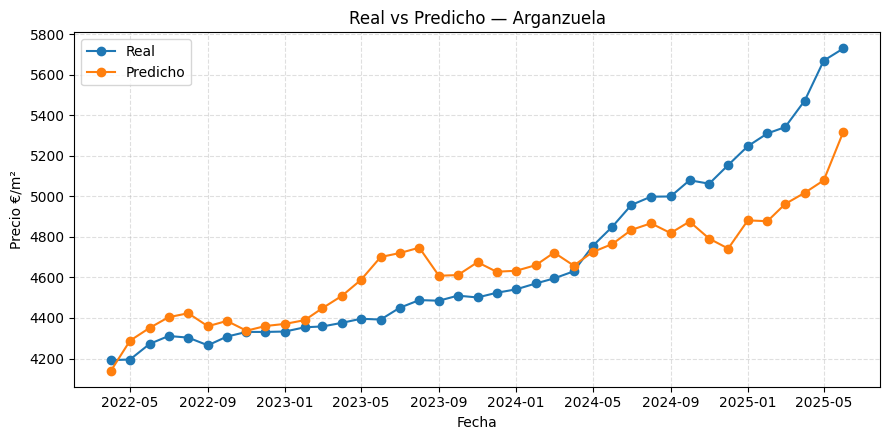

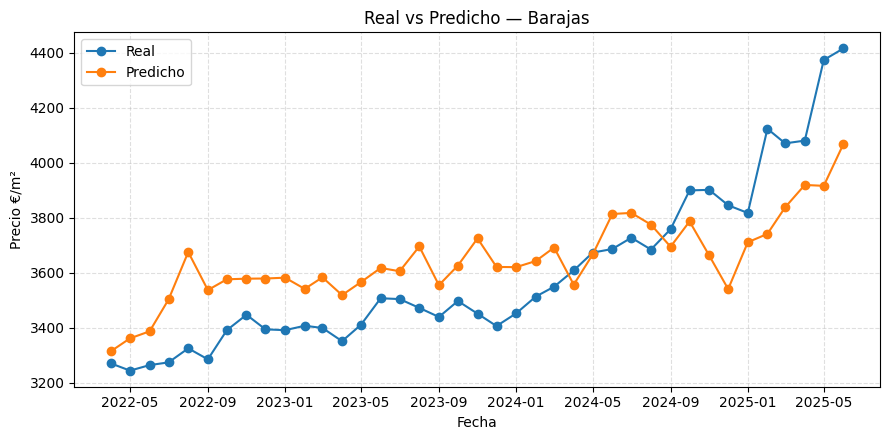

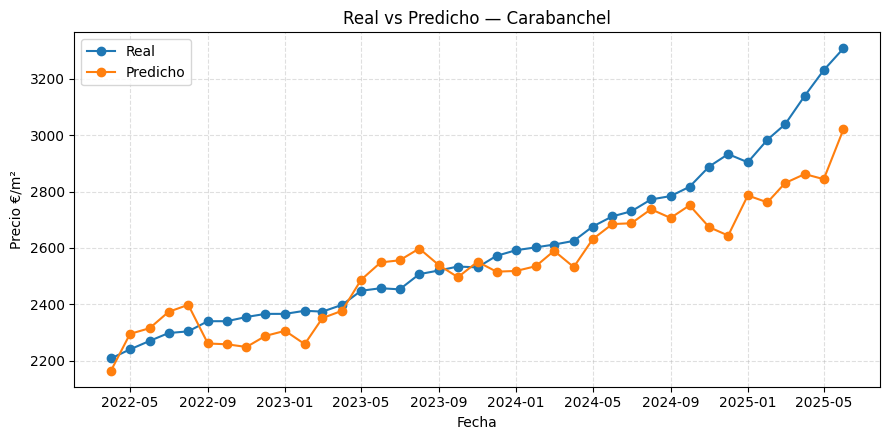

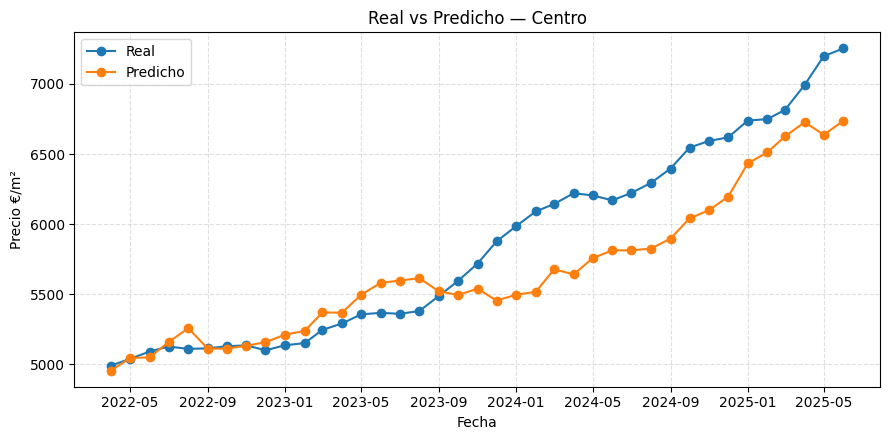

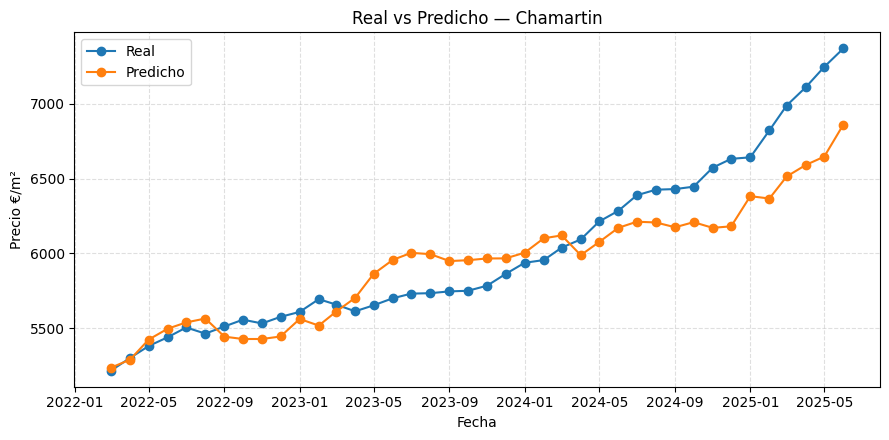

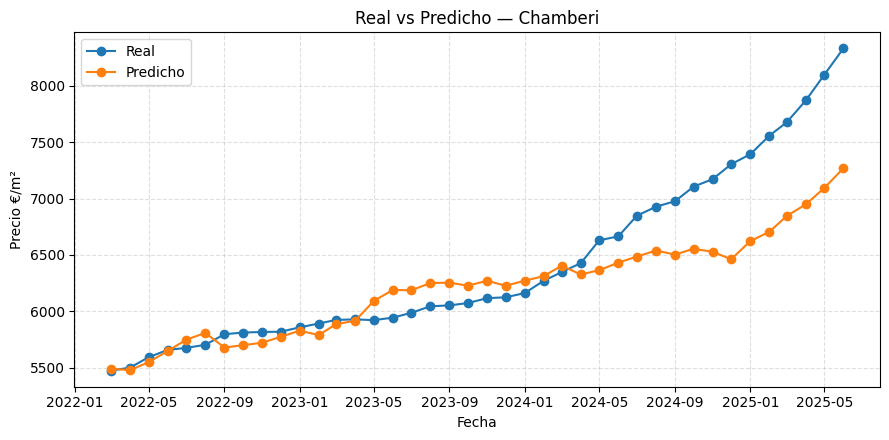

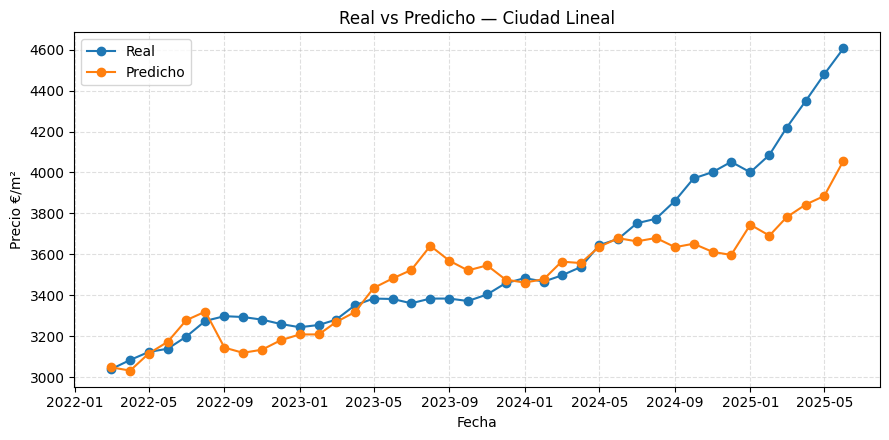

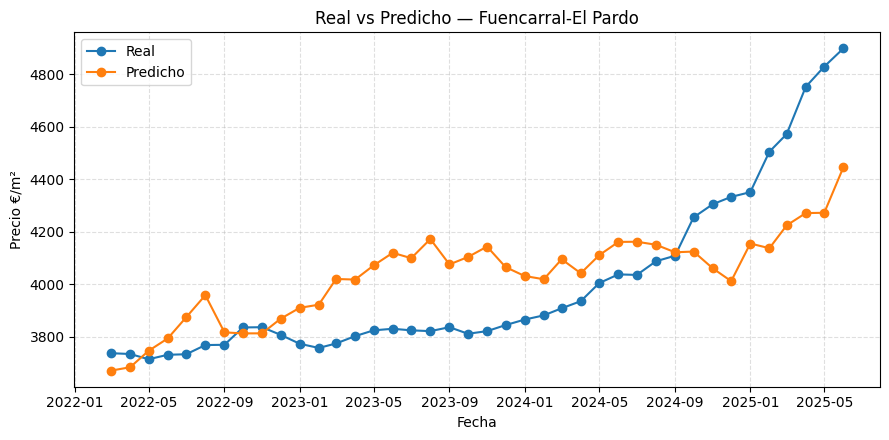

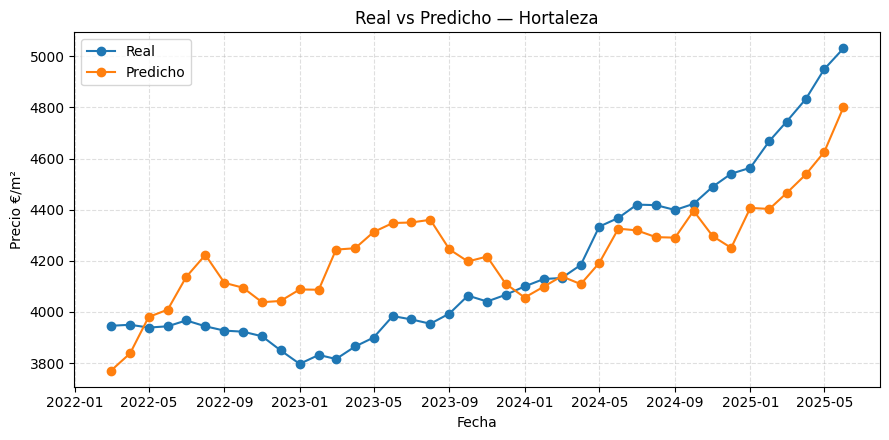

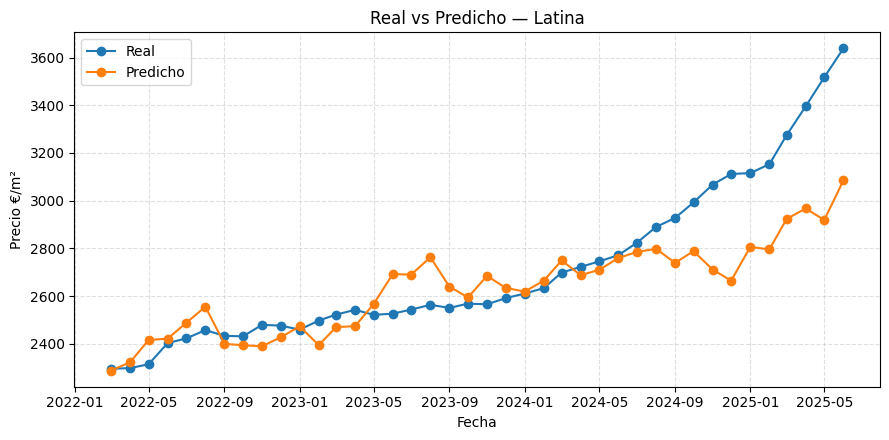

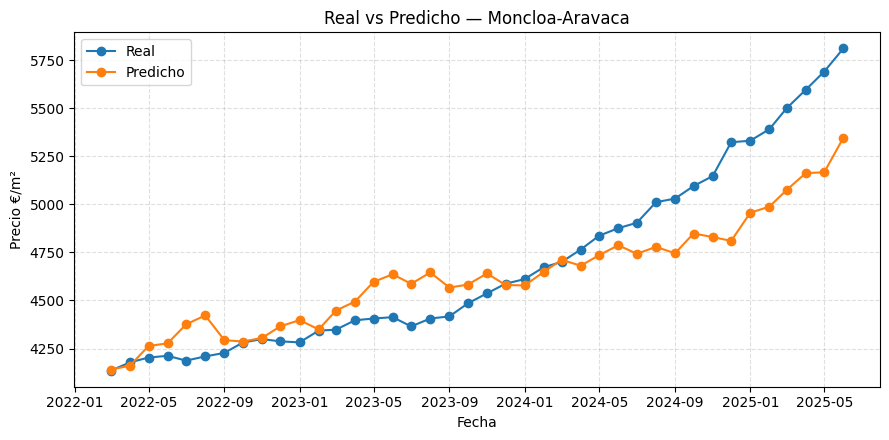

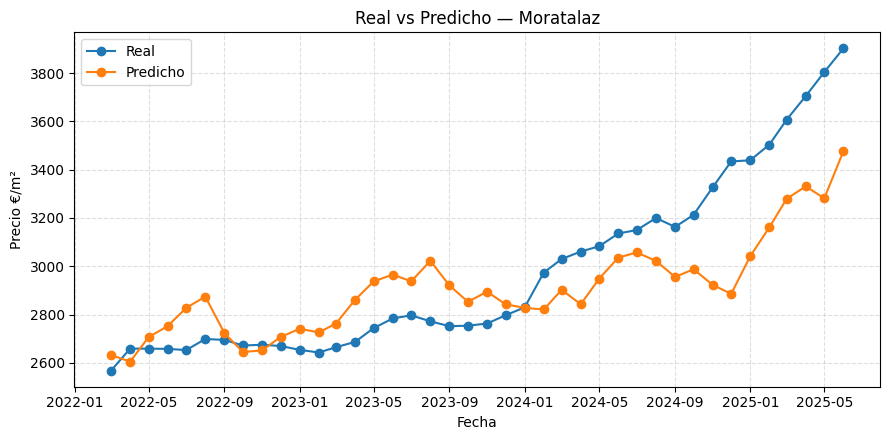

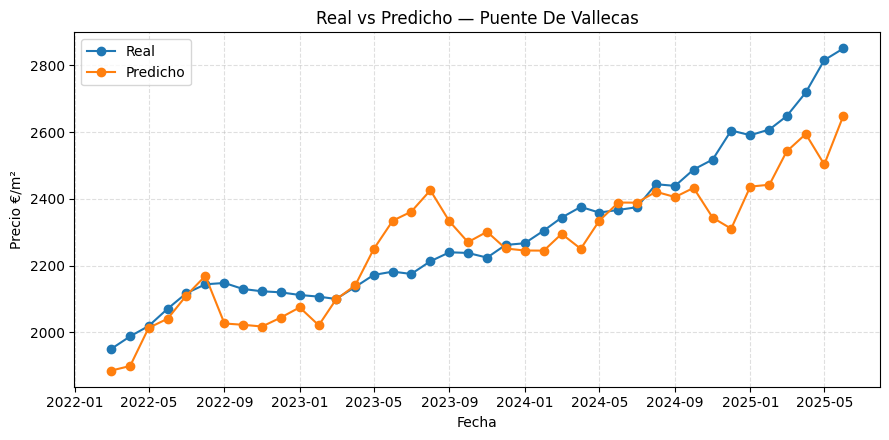

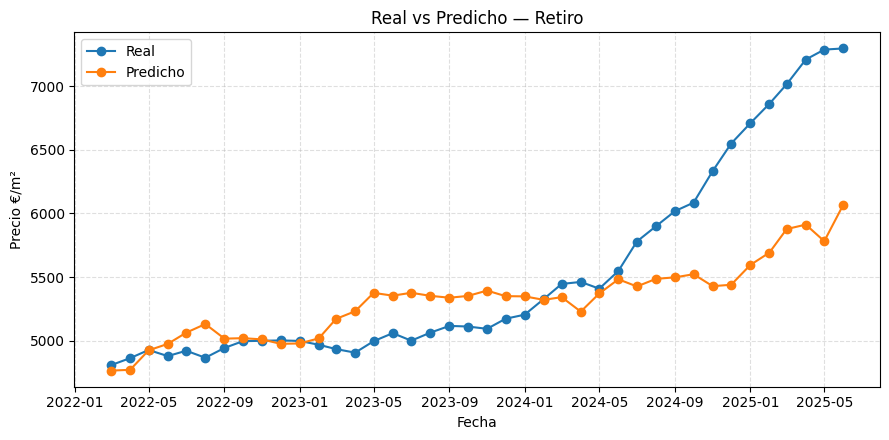

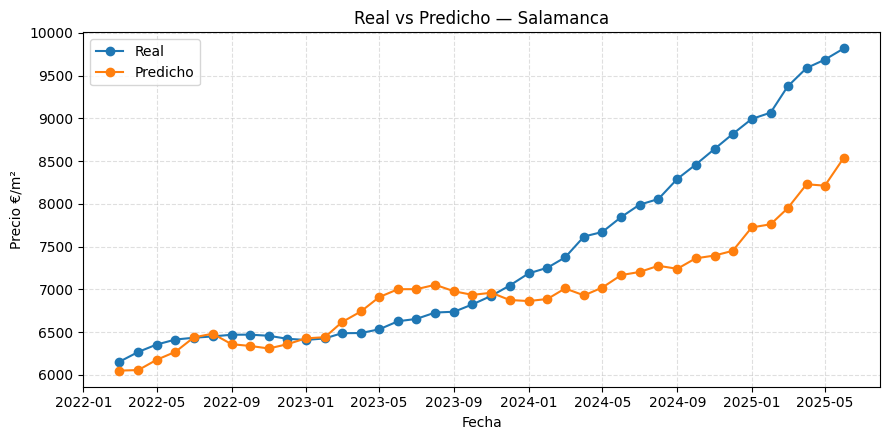

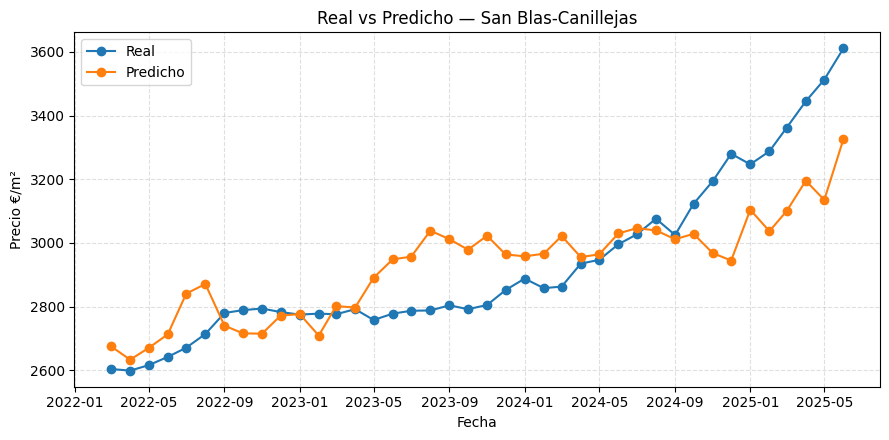

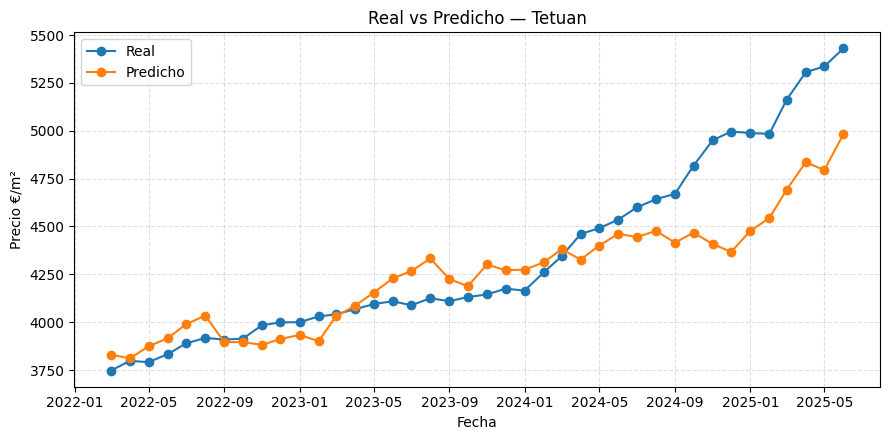

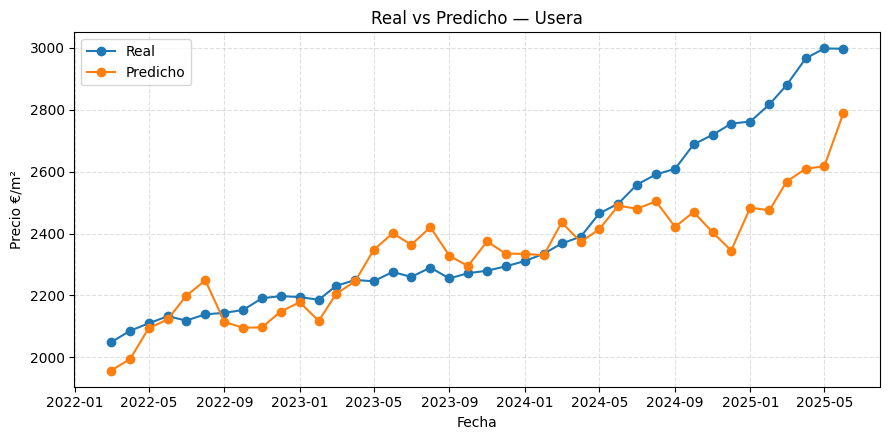

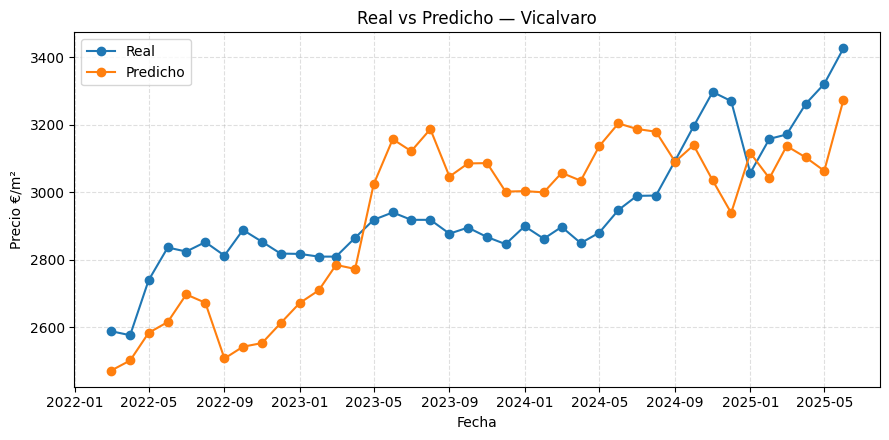

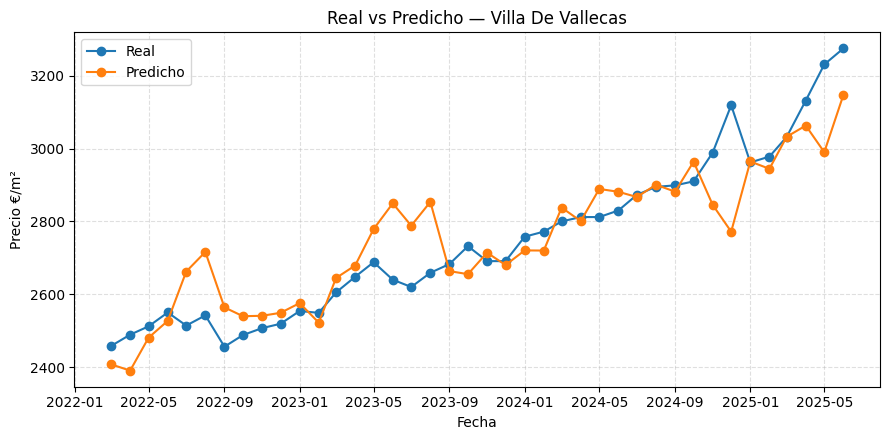

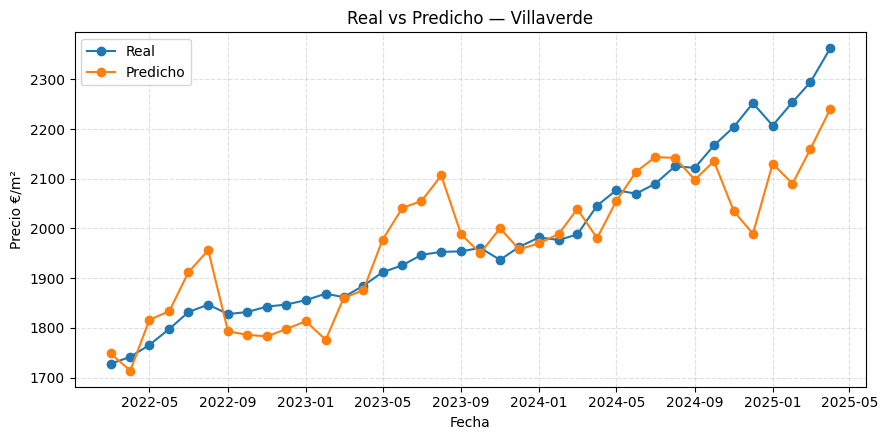

In [25]:
# === Real vs Predicho por distrito - TEST ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- columnas necesarias en X_test ---
COL_ANO  = "AÑO"
COL_MES  = "MES_NUM"

# 1) Predicciones en test
y_hat = best_model.predict(X_test)

# 2) Reconstruir DISTRITO desde dummies OHE que empiezan por 'DIST_'
dist_cols = [c for c in X_test.columns if c.startswith("DIST_")]
if len(dist_cols) == 0:
    raise ValueError("No se encontraron columnas de distrito que empiecen por 'DIST_' en X_test.")

# etiqueta del distrito de cada fila (maneja filas con todo 0)
dist_idx = X_test[dist_cols].idxmax(axis=1)
sin_distrito = (X_test[dist_cols].sum(axis=1) == 0)
dist_idx = dist_idx.mask(sin_distrito, "DIST_SIN_ETIQUETA")
dist_labels = dist_idx.str.replace("DIST_", "", regex=False)

# 3) Fecha (año+mes -> primer día del mes)
fechas = pd.to_datetime(
    dict(year=X_test[COL_ANO].astype(int),
         month=X_test[COL_MES].astype(int),
         day=1)
)

# 4) DataFrame para plotear
df_plot = pd.DataFrame({
    "FECHA": fechas,
    "DISTRITO": dist_labels,
    "REAL": pd.Series(y_test, index=X_test.index).values,   # asegura alineación por índice
    "PRED": y_hat
}, index=X_test.index)

# (opcional) si hay múltiples filas por distrito-fecha, se agrega la media
df_plot = (df_plot
           .groupby(["DISTRITO", "FECHA"], as_index=False)
           .agg(REAL=("REAL", "mean"), PRED=("PRED", "mean"))
           .sort_values(["DISTRITO", "FECHA"]))

# 5) Un gráfico por distrito
for dist, g in df_plot.groupby("DISTRITO"):
    plt.figure(figsize=(9, 4.5))
    plt.plot(g["FECHA"], g["REAL"], marker="o", label="Real")
    plt.plot(g["FECHA"], g["PRED"], marker="o", label="Predicho")
    plt.title(f"Real vs Predicho — {dist}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio €/m²")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


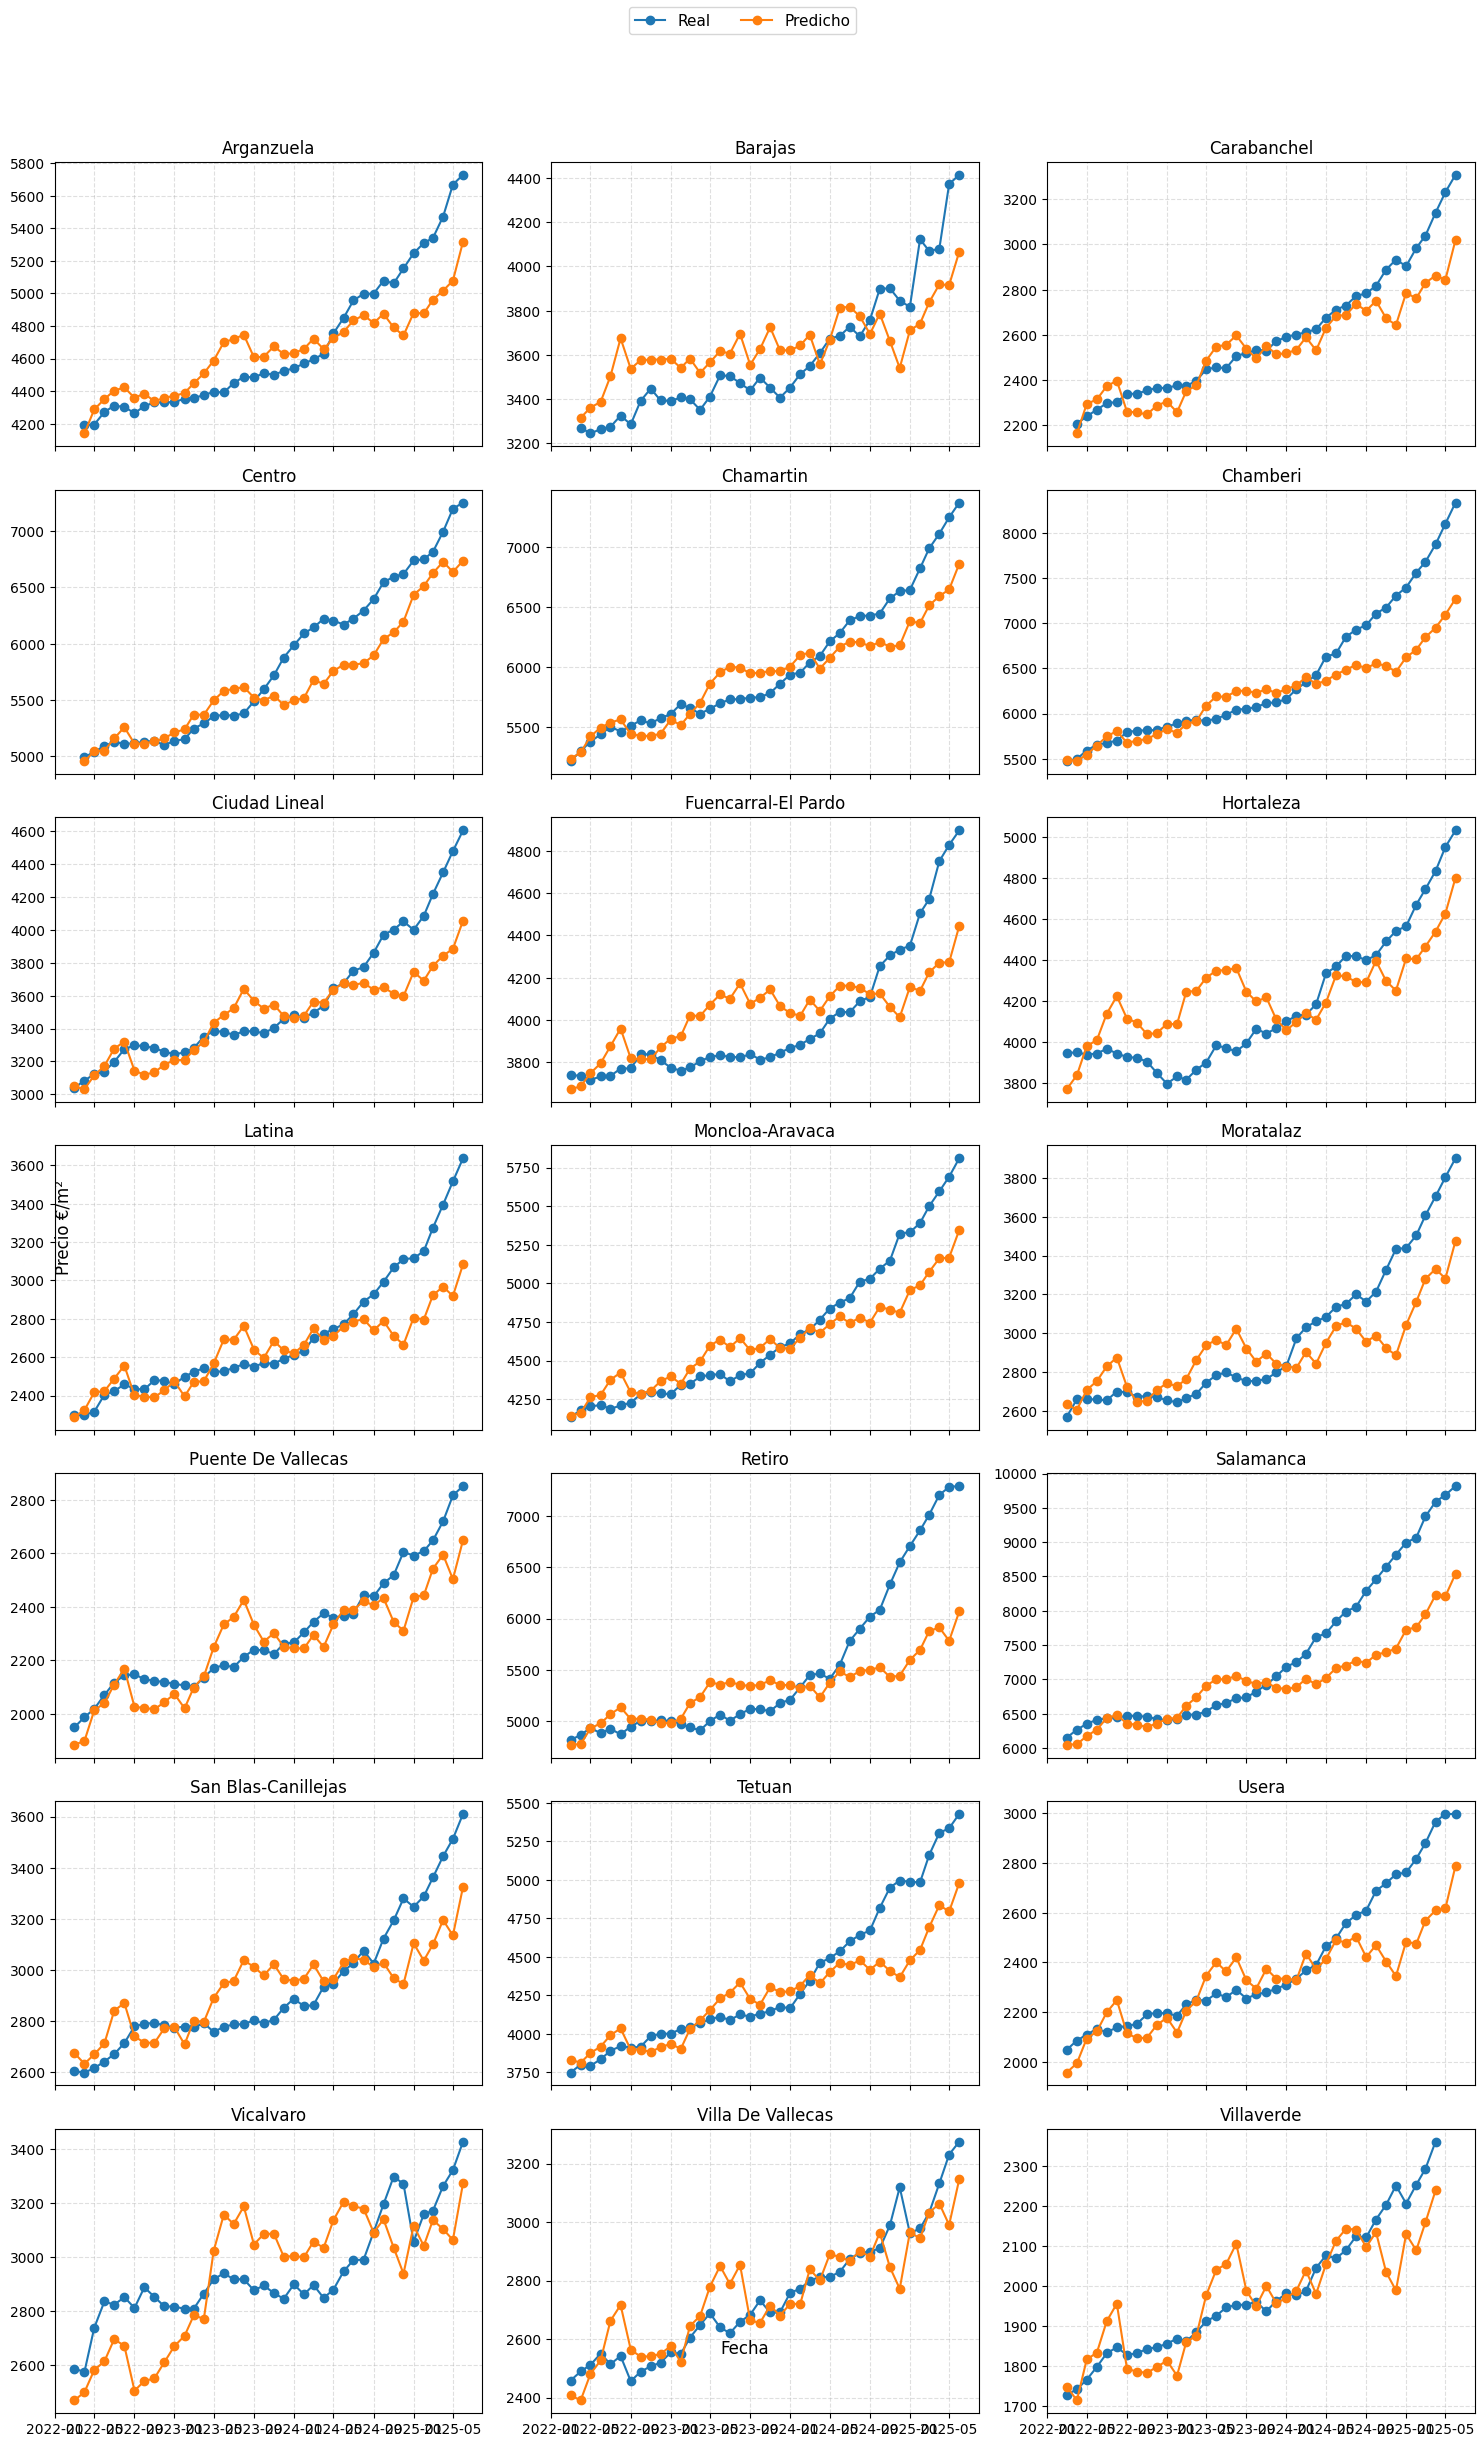

In [26]:
import math
import matplotlib.pyplot as plt

# Número de distritos
distritos = df_plot["DISTRITO"].unique()
n_distritos = len(distritos)

n_cols = 3
n_rows = math.ceil(n_distritos / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3.5*n_rows), sharex=True, sharey=False)
axes = axes.flatten()  # para indexar fácilmente

for i, dist in enumerate(sorted(distritos)):
    ax = axes[i]
    g = df_plot[df_plot["DISTRITO"] == dist]
    
    ax.plot(g["FECHA"], g["REAL"], marker="o", label="Real")
    ax.plot(g["FECHA"], g["PRED"], marker="o", label="Predicho")
    
    ax.set_title(dist)
    ax.grid(True, linestyle="--", alpha=0.4)

# Quitar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Etiquetas comunes
fig.text(0.5, 0.04, "Fecha", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Precio €/m²", va="center", rotation="vertical", fontsize=12)

# Leyenda única fuera del grid
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, fontsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para la leyenda arriba
plt.show()


### GENERAR PREDICCIÓN SOBRE DF_PREDICCION

In [27]:

# Celda — Sobrescribir la columna TARGET en df_prediccion con la predicción
# Requisitos: best_model ya entrenado, X_train definido, df_prediccion con mismas features crudas
# =====================================================

TARGET = globals().get('TARGET', 'PRECIO M2')

# 1) Alinear columnas de entrada al esquema de entrenamiento (solo features)
feature_cols = X_train.columns.tolist()
X_prediccion = df_prediccion.reindex(columns=feature_cols, fill_value=0)

# 2) Asegurar mismos tipos (útil para dummies int32)
for c in feature_cols:
    try:
        X_prediccion[c] = X_prediccion[c].astype(X_train[c].dtype, copy=False)
    except Exception:
        pass

# 3) Predecir con el pipeline (se encarga del escalado interno)
preds = best_model.predict(X_prediccion)

# 4) Sobrescribir la columna del target en df_prediccion
df_prediccion.loc[X_prediccion.index, TARGET] = preds

# 5) Vista rápida
print(f"Primeras filas de df_prediccion (columna '{TARGET}' sobrescrita):")
print(df_prediccion[[TARGET]].head())


Primeras filas de df_prediccion (columna 'PRECIO M2' sobrescrita):
     PRECIO M2
0  5454.980665
1  5435.372375
2  5449.110153
3  5383.542840
4  5454.401998


In [28]:
df_prediccion

,AÑO,MES_NUM,LATITUD,LONGITUD,SHAPE_AREA,PRECIO M2,EURIBOR_lag12,VARIACIÓN ANUAL_lag12,PRECIO M2_lag12,TRANSACCIONES_CM_lag12,...,DIST_Moratalaz,DIST_Puente De Vallecas,DIST_Retiro,DIST_Salamanca,DIST_San Blas-Canillejas,DIST_Tetuan,DIST_Usera,DIST_Vicalvaro,DIST_Villa De Vallecas,DIST_Villaverde
0,2025,7,40.40021,-3.69618,6.462176e+06,5454.980665,0.03526,0.114,4957,6657,...,0,0,0,0,0,0,0,0,0,0
1,2025,8,40.40021,-3.69618,6.462176e+06,5435.372375,0.03169,0.114,4998,5423,...,0,0,0,0,0,0,0,0,0,0
2,2025,9,40.40021,-3.69618,6.462176e+06,5449.110153,0.02940,0.114,4999,7380,...,0,0,0,0,0,0,0,0,0,0
3,2025,10,40.40021,-3.69618,6.462176e+06,5383.542840,0.02686,0.126,5079,7380,...,0,0,0,0,0,0,0,0,0,0
4,2025,11,40.40021,-3.69618,6.462176e+06,5454.401998,0.02506,0.125,5062,6876,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2026,2,40.37400,-3.70000,2.019432e+07,2430.975515,0.02402,0.140,2254,6963,...,0,0,0,0,0,0,0,0,0,1
248,2026,3,40.37400,-3.70000,2.019432e+07,2488.747746,0.02398,0.154,2294,7380,...,0,0,0,0,0,0,0,0,0,1
249,2026,4,40.37400,-3.70000,2.019432e+07,2548.004598,0.02143,0.155,2362,6604,...,0,0,0,0,0,0,0,0,0,1
250,2026,5,40.37400,-3.70000,2.019432e+07,2548.004598,0.02143,0.155,2362,6604,...,0,0,0,0,0,0,0,0,0,1


In [37]:
# Anular OHE - crear columna de Distrito con todos los distritos en ella

# Lista de columnas OHE (todas las que empiezan por "DIST_")
ohe_cols = [c for c in df_prediccion.columns if c.startswith("DIST_")]

# Reconstruir la categoría original
df_prediccion["DISTRITO"] = df_prediccion[ohe_cols].idxmax(axis=1)

# Quitar el prefijo "DIST_"
df_prediccion["DISTRITO"] = df_prediccion["DISTRITO"].str.replace("DIST_", "", regex=False)

# Eliminar las columnas dummy
df_prediccion = df_prediccion.drop(columns=ohe_cols)

df_prediccion

,AÑO,MES_NUM,LATITUD,LONGITUD,SHAPE_AREA,PRECIO M2,EURIBOR_lag12,VARIACIÓN ANUAL_lag12,PRECIO M2_lag12,TRANSACCIONES_CM_lag12,INDICE_PRECIO_lag12,TOTAL_HIPOTECAS_lag12,POBLACION_ACTIVA_lag12,POBLACION_lag12,ESPERANZA_VIDA_lag12,VIVIENDAS_COMPRAVENTA_lag12,TRANSACCIONES_SUELO_lag12,PRECIO_MEDIO_M2_CCMM_lag12,DISTRITO
0,2025,7,40.40021,-3.69618,6.462176e+06,5454.980665,0.03526,0.114,4957,6657,174.54,6982.0,3784.3,313118.0,86.10,1156.0,349.0,5.735798,Arganzuela
1,2025,8,40.40021,-3.69618,6.462176e+06,5435.372375,0.03169,0.114,4998,5423,174.54,5494.0,3784.3,313118.0,86.10,917.0,349.0,5.735798,Arganzuela
2,2025,9,40.40021,-3.69618,6.462176e+06,5449.110153,0.02940,0.114,4999,7380,174.54,8362.0,3784.3,313118.0,86.10,1610.0,349.0,5.735798,Arganzuela
3,2025,10,40.40021,-3.69618,6.462176e+06,5383.542840,0.02686,0.126,5079,7380,174.54,10791.0,3784.3,313118.0,86.10,2047.0,294.0,5.818598,Arganzuela
4,2025,11,40.40021,-3.69618,6.462176e+06,5454.401998,0.02506,0.125,5062,6876,174.54,8803.0,3784.3,313118.0,86.10,1587.0,294.0,5.818598,Arganzuela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2026,2,40.37400,-3.70000,2.019432e+07,2430.975515,0.02402,0.140,2254,6963,174.54,6701.0,3784.3,148071.0,83.95,1786.0,436.0,5.728020,Villaverde
248,2026,3,40.37400,-3.70000,2.019432e+07,2488.747746,0.02398,0.154,2294,7380,174.54,7973.0,3784.3,148071.0,83.95,1843.0,436.0,5.728020,Villaverde
249,2026,4,40.37400,-3.70000,2.019432e+07,2548.004598,0.02143,0.155,2362,6604,134.63,8425.0,3784.3,148071.0,83.95,1499.0,362.0,5.742266,Villaverde
250,2026,5,40.37400,-3.70000,2.019432e+07,2548.004598,0.02143,0.155,2362,6604,134.63,8425.0,3784.3,148071.0,83.95,1499.0,362.0,5.742266,Villaverde


In [38]:
df_prediccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          252 non-null    int64  
 1   MES_NUM                      252 non-null    int64  
 2   LATITUD                      252 non-null    float64
 3   LONGITUD                     252 non-null    float64
 4   SHAPE_AREA                   252 non-null    float64
 5   PRECIO M2                    252 non-null    float64
 6   EURIBOR_lag12                252 non-null    float64
 7   VARIACIÓN ANUAL_lag12        252 non-null    float64
 8   PRECIO M2_lag12              252 non-null    int64  
 9   TRANSACCIONES_CM_lag12       252 non-null    int64  
 10  INDICE_PRECIO_lag12          252 non-null    float64
 11  TOTAL_HIPOTECAS_lag12        252 non-null    float64
 12  POBLACION_ACTIVA_lag12       252 non-null    float64
 13  POBLACION_lag12     

### Representación predicciones

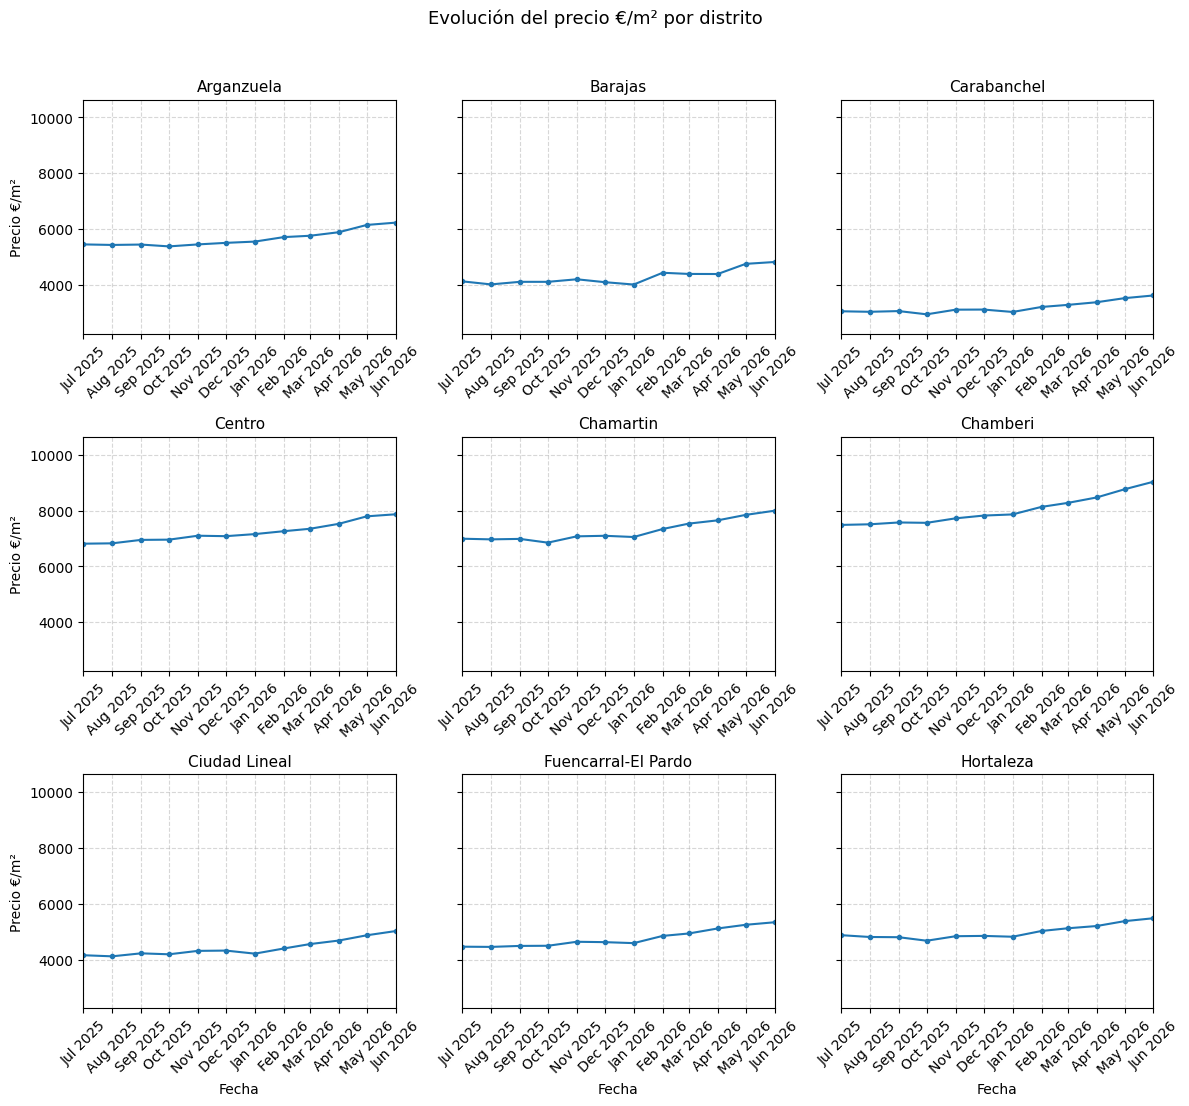

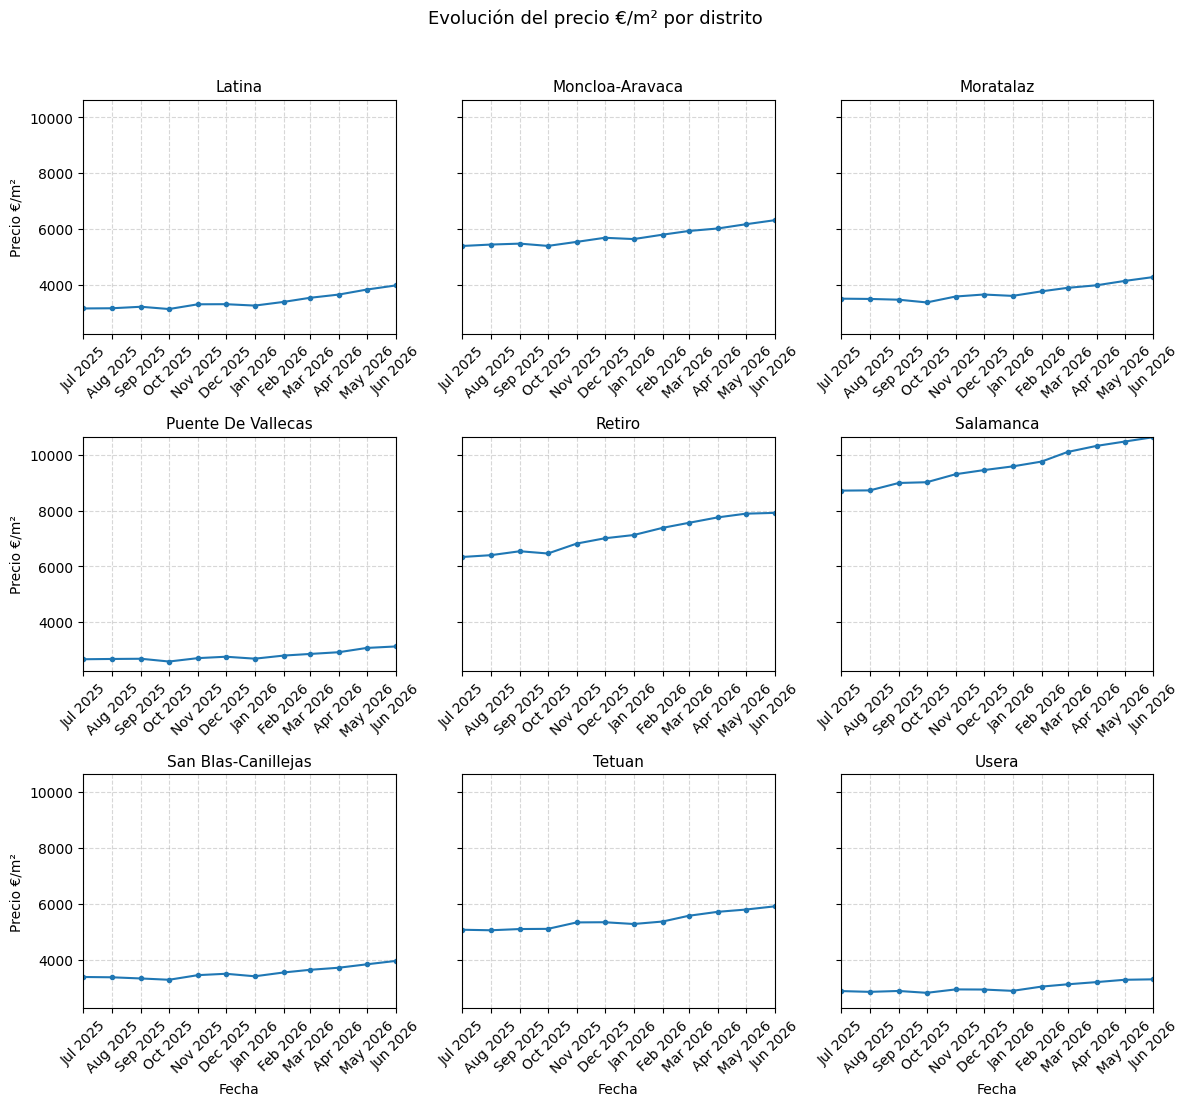

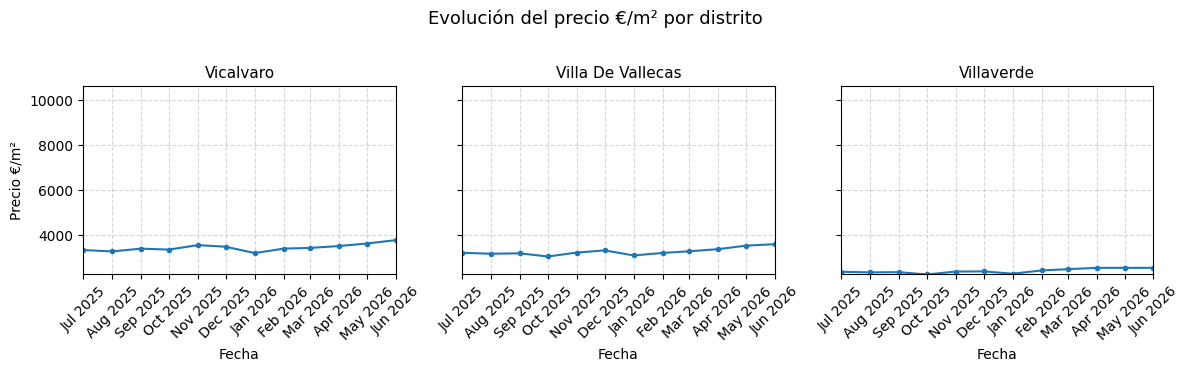

In [39]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

COL_ANO   = "AÑO"
COL_MES   = "MES_NUM"
COL_DIST  = "DISTRITO"
COL_PRICE = "PRECIO M2" 

# 1) FECHA + agregación mensual por distrito
dfp = df_prediccion.copy()
dfp["FECHA"] = pd.to_datetime(
    dict(year=dfp[COL_ANO].astype(int),
         month=dfp[COL_MES].astype(int),
         day=1)
)
agg = (dfp.groupby([COL_DIST, "FECHA"], as_index=False)[COL_PRICE]
          .mean()
          .sort_values([COL_DIST, "FECHA"]))

# 2) Distritos y límites globales
distritos = agg[COL_DIST].drop_duplicates().tolist()
ymin, ymax = agg[COL_PRICE].min(), agg[COL_PRICE].max()
xmin, xmax = agg["FECHA"].min(), agg["FECHA"].max()

# --- Formato de fechas: un tick por mes y etiqueta en todos los subplots ---
month_locator = mdates.MonthLocator(interval=1)      
date_fmt      = mdates.DateFormatter('%b %Y')        

# 3) Panel por páginas
N_PER_PAGE = 9
NCOLS = 3

for start in range(0, len(distritos), N_PER_PAGE):
    bloque = distritos[start:start + N_PER_PAGE]
    N = len(bloque)
    NROWS = math.ceil(N / NCOLS)

    # Nota: sharex=False para que NO se oculten las etiquetas internas
    fig, axes = plt.subplots(
        nrows=NROWS, ncols=NCOLS,
        figsize=(12, 3.6*NROWS),
        sharex=False, sharey=True
    )

    # Normalizar axes a array 2D
    axes = np.atleast_2d(axes)

    for i, dist in enumerate(bloque):
        r, c = divmod(i, NCOLS)
        ax = axes[r, c]

        g = agg.loc[agg[COL_DIST] == dist]
        ax.plot(g["FECHA"], g[COL_PRICE], marker="o", linewidth=1.5, markersize=3)
        ax.set_title(dist, fontsize=11)
        ax.grid(True, linestyle="--", alpha=0.5)
        ax.set_ylim(ymin, ymax)
        ax.set_xlim(xmin, xmax)

        # <<< Mostrar meses en TODOS los subplots >>>
        ax.xaxis.set_major_locator(month_locator)
        ax.xaxis.set_major_formatter(date_fmt)
        ax.tick_params(axis='x', labelbottom=True, rotation=45)

        if c == 0:
            ax.set_ylabel("Precio €/m²")
        if r == NROWS - 1:
            ax.set_xlabel("Fecha")

    # Ocultar huecos
    total_cells = NROWS * NCOLS
    for j in range(N, total_cells):
        r, c = divmod(j, NCOLS)
        axes[r, c].axis("off")

    fig.suptitle("Evolución del precio €/m² por distrito", y=1.02, fontsize=13)
    plt.tight_layout()
    plt.show()


In [40]:
df_prediccion.to_excel(r"C:\Users\evahr\Downloads\TFM-idealista\df_final_con_predicciones.xlsx", index=False)

# 2. Gradient Boosting Regressor

In [33]:
# ============================================
# Gradient Boosting Regressor (GBR) con CV temporal
# - Sin split interno
# - Sin SimpleImputer (no hay nulos)
# - Escala SOLO columnas no binarias (binarias = int32 con {0,1})
# ============================================

import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

# 1) Detectar binarias (int32 con {0,1}) y continuas (resto numéricas)
bin_cols = []
for c in X_train.columns:
    s = X_train[c]
    if s.dtype == "int32":
        vals = set(pd.unique(s.dropna()))
        if vals.issubset({0, 1}) and len(vals) > 0:
            bin_cols.append(c)

num_all = list(X_train.select_dtypes(include=[np.number]).columns)
cont_cols = [c for c in num_all if c not in bin_cols]  # estas se escalan

# 2) Preprocesado: escala continuas; binarias pasan tal cual
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=True, with_std=True), cont_cols),
        ("bin", "passthrough", bin_cols)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# 3) Pipeline GBR
pipeline = Pipeline(steps=[
    ("prep", preprocess),
    ("gbr", GradientBoostingRegressor(random_state=42))
])

# 4) GridSearchCV con TimeSeriesSplit (walk-forward)
param_grid = {
    "gbr__n_estimators": [100, 200],
    "gbr__max_depth": [2, 3, 4],
    "gbr__learning_rate": [0.05, 0.1, 0.2],
    "gbr__subsample": [0.8, 1.0]
}
tscv = TimeSeriesSplit(n_splits=5)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="r2",           
    cv=tscv,
    n_jobs=-1,
    verbose=1,
    refit=True,
    return_train_score=True
)

# 5) Entrenar SOLO con datos de train
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor R² CV (TimeSeriesSplit):", float(grid.best_score_))

# 6) Evaluación en train/test
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

metrics = {
    "R2_train": float(r2_score(y_train, y_pred_train)),
    "R2_test":  float(r2_score(y_test,  y_pred_test)),
    "MAE_test": float(mean_absolute_error(y_test, y_pred_test)),
    "RMSE_test": float(rmse(y_test, y_pred_test))
}
print("\nMétricas finales GBR:")
print(metrics)

# 7) Importancias de variables
try:
    feature_names = best_model.named_steps["prep"].get_feature_names_out()
except Exception:
    # respaldo: orden aproximado (cont + bin)
    feature_names = np.array(cont_cols + bin_cols)

importances = best_model.named_steps["gbr"].feature_importances_
feat_imp = pd.DataFrame({"feature": feature_names, "importance": importances}) \
            .sort_values("importance", ascending=False, ignore_index=True)

print("\nTop 15 features más importantes en GBR:")
print(feat_imp.head(15).to_string(index=False))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'gbr__learning_rate': 0.2, 'gbr__max_depth': 2, 'gbr__n_estimators': 200, 'gbr__subsample': 0.8}
Mejor R² CV (TimeSeriesSplit): 0.9472530193152231

Métricas finales GBR:
{'R2_train': 0.9959004720779097, 'R2_test': 0.6880792448697626, 'MAE_test': 590.9349541360159, 'RMSE_test': 873.9270579667547}

Top 15 features más importantes en GBR:
                  feature  importance
          PRECIO M2_lag12    0.944503
            EURIBOR_lag12    0.017950
                  LATITUD    0.010856
                      AÑO    0.006273
    VARIACIÓN ANUAL_lag12    0.004847
   POBLACION_ACTIVA_lag12    0.003310
      INDICE_PRECIO_lag12    0.002799
TRANSACCIONES_SUELO_lag12    0.002730
               SHAPE_AREA    0.002388
     ESPERANZA_VIDA_lag12    0.000986
           DIST_Salamanca    0.000809
   TRANSACCIONES_CM_lag12    0.000499
          POBLACION_lag12    0.000497
    TOTAL_HIPOTECAS_lag12    0.000351
         

In [34]:
# ============================================
# Gradient Boosting Regressor (GBR) con CV temporal (MAE)
# - Sin split interno, sin imputer
# - Escala SOLO columnas no binarias (binarias = int32 con {0,1})
# - Métricas: MAE, RMSE, MAPE, R², R² ajustado, R² train/test
# ============================================

import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---- utilidades ----
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float).ravel()
    y_pred = np.asarray(y_pred, dtype=float).ravel()
    denom = np.where(y_true == 0, np.nan, np.abs(y_true))
    return float(np.nanmean(np.abs(y_true - y_pred) / denom) * 100.0)

def adjusted_r2(r2, n, p):
    if n - p - 1 <= 0:
        return np.nan
    return float(1.0 - (1.0 - r2) * (n - 1) / (n - p - 1))


# 1) Detectar binarias (int32 con {0,1}) y continuas (resto numéricas)
bin_cols = []
for c in X_train.columns:
    s = X_train[c]
    if s.dtype == "int32":
        vals = set(pd.unique(s.dropna()))
        if vals.issubset({0, 1}) and len(vals) > 0:
            bin_cols.append(c)

num_all = list(X_train.select_dtypes(include=[np.number]).columns)
cont_cols = [c for c in num_all if c not in bin_cols]  # estas se escalan

# 2) Preprocesado: escala continuas; binarias pasan tal cual
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), cont_cols),
        ("bin", "passthrough", bin_cols)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# 3) Pipeline GBR
pipeline = Pipeline(steps=[
    ("prep", preprocess),
    ("gbr", GradientBoostingRegressor(random_state=42))
])

# 4) GridSearchCV con TimeSeriesSplit (walk-forward) y MAE
param_grid = {
    "gbr__n_estimators": [100, 200],
    "gbr__max_depth": [2, 3, 4],
    "gbr__learning_rate": [0.05, 0.1, 0.2],
    "gbr__subsample": [0.8, 1.0]
}
tscv = TimeSeriesSplit(n_splits=5)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",   # <<< MAE
    cv=tscv,
    n_jobs=-1,
    verbose=1,
    refit=True,
    return_train_score=True
)

# 5) Entrenar SOLO con datos de train
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_
best_cv_mae = -float(grid.best_score_)  # invertir signo

print("Mejores parámetros:", best_params)
print("Mejor CV MAE (TimeSeriesSplit):", best_cv_mae)

# 6) Evaluación en train/test
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

mae_test  = float(mean_absolute_error(y_test, y_pred_test))
rmse_test = rmse(y_test, y_pred_test)
mape_test = mape(y_test, y_pred_test)
r2_tr     = float(r2_score(y_train, y_pred_train))
r2_te     = float(r2_score(y_test,  y_pred_test))

# 7) Importancias (porcentaje) y R² ajustado
feature_names = list(best_model.named_steps["prep"].get_feature_names_out())
importances = best_model.named_steps["gbr"].feature_importances_

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances,
    "porc_importancia": importances * 100.0  # suman 100%
}).sort_values("porc_importancia", ascending=False, ignore_index=True)

# p = nº de features utilizadas (importancia > 0); aproximación para R² ajustado
p = int((feat_imp["importance"] > 0).sum())
r2_adj = adjusted_r2(r2_te, n=len(y_test), p=p)

metricas = pd.DataFrame({
    "métrica": ["CV MAE (best)", "MAE test", "RMSE test", "MAPE test (%)", "R² test", "R² ajustado test", "R² train"],
    "valor":   [best_cv_mae,      mae_test,    rmse_test,   mape_test,      r2_te,     r2_adj,            r2_tr]
})

print("\nMétricas:")
print(metricas.to_string(index=False))

print("\nTop 15 features más importantes en GBR (con %):")
print(feat_imp.head(15)[["feature","porc_importancia"]].to_string(index=False))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'gbr__learning_rate': 0.2, 'gbr__max_depth': 2, 'gbr__n_estimators': 200, 'gbr__subsample': 0.8}
Mejor CV MAE (TimeSeriesSplit): 161.6937552626701

Métricas:
         métrica      valor
   CV MAE (best) 161.693755
        MAE test 590.934954
       RMSE test 873.927058
   MAPE test (%)  13.159902
         R² test   0.688079
R² ajustado test   0.674806
        R² train   0.995900

Top 15 features más importantes en GBR (con %):
                  feature  porc_importancia
          PRECIO M2_lag12         94.450309
            EURIBOR_lag12          1.794962
                  LATITUD          1.085574
                      AÑO          0.627284
    VARIACIÓN ANUAL_lag12          0.484687
   POBLACION_ACTIVA_lag12          0.331042
      INDICE_PRECIO_lag12          0.279945
TRANSACCIONES_SUELO_lag12          0.272975
               SHAPE_AREA          0.238814
     ESPERANZA_VIDA_lag12          0.098567
  

In [35]:
# ============================================
# GBR con CV temporal + regularización para reducir overfitting
# ============================================

import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---- utilidades ----
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float).ravel()
    y_pred = np.asarray(y_pred, dtype=float).ravel()
    denom = np.where(y_true == 0, np.nan, np.abs(y_true))
    return float(np.nanmean(np.abs(y_true - y_pred) / denom) * 100.0)

def adjusted_r2(r2, n, p):
    if n - p - 1 <= 0:
        return np.nan
    return float(1.0 - (1.0 - r2) * (n - 1) / (n - p - 1))

# 1) Detectar binarias (int32 con {0,1}) y continuas (resto numéricas)
bin_cols = []
for c in X_train.columns:
    s = X_train[c]
    if s.dtype == "int32":
        vals = set(pd.unique(s.dropna()))
        if vals.issubset({0, 1}) and len(vals) > 0:
            bin_cols.append(c)

num_all = list(X_train.select_dtypes(include=[np.number]).columns)
cont_cols = [c for c in num_all if c not in bin_cols]  # estas se escalan

# 2) Preprocesado: escala continuas; binarias pasan tal cual
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), cont_cols),
        ("bin", "passthrough", bin_cols)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# 3) Pipeline GBR
pipeline = Pipeline(steps=[
    ("prep", preprocess),
    ("gbr", GradientBoostingRegressor(random_state=42))
])

# 4) GridSearchCV con TimeSeriesSplit (walk-forward) + MAE
#    Palancas anti-overfitting: depth bajo, muchas hojas mínimas, subsample<1, max_features limitado,
#    LR pequeña con más árboles y pérdida 'absolute_error' (optimiza MAE).
param_grid = {
    "gbr__loss": ["absolute_error"],                  # optimiza MAE directamente
    "gbr__n_estimators": [300, 500, 800],
    "gbr__learning_rate": [0.02, 0.05, 0.1],
    "gbr__max_depth": [1, 2, 3],                      # reduce complejidad del árbol base
    "gbr__min_samples_leaf": [10, 25, 50],            # hojas mínimas grandes
    "gbr__min_samples_split": [20, 50, 100],
    "gbr__max_features": [None, "sqrt", 0.5],         # limita variables por split
    "gbr__subsample": [0.6, 0.8, 1.0]                 # <1 introduce aleatoriedad (mejor generaliza)
}

# CV temporal con ventana fija y gap (ajusta a tu horizonte/lag)
VENTANA = 72   
GAP     = 12   
try:
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=VENTANA, gap=GAP)
except TypeError:
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=VENTANA)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    n_jobs=-1,
    verbose=1,
    refit=True,
    return_train_score=True
)

# 5) Entrenar SOLO con datos de train
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_
best_cv_mae = -float(grid.best_score_)

print("Mejores parámetros:", best_params)
print("Mejor CV MAE (TimeSeriesSplit):", best_cv_mae)

# 6) Evaluación en train/test
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

mae_test  = float(mean_absolute_error(y_test, y_pred_test))
rmse_test = rmse(y_test, y_pred_test)
mape_test = mape(y_test, y_pred_test)
r2_tr     = float(r2_score(y_train, y_pred_train))
r2_te     = float(r2_score(y_test,  y_pred_test))

# 7) Importancias (porcentaje) y R² ajustado
feature_names = list(best_model.named_steps["prep"].get_feature_names_out())
importances = best_model.named_steps["gbr"].feature_importances_
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances,
    "porc_importancia": importances * 100.0
}).sort_values("porc_importancia", ascending=False, ignore_index=True)

p_eff = int((feat_imp["importance"] > 0).sum())  # aprox. para R² ajustado
r2_adj = adjusted_r2(r2_te, n=len(y_test), p=p_eff)



metricas = pd.DataFrame({
    "métrica": ["CV MAE (best)", "MAE test", "RMSE test", "MAPE test (%)", "R² test", "R² ajustado test", "R² train"],
    "valor":   [best_cv_mae,      mae_test,    rmse_test,   mape_test,      r2_te,     r2_adj,            r2_tr]
})

print("\nMétricas:")
print(metricas.to_string(index=False))

print("\nTop 15 features más importantes en GBR (con %):")
print(feat_imp.head(15)[["feature","porc_importancia"]].to_string(index=False))


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Mejores parámetros: {'gbr__learning_rate': 0.05, 'gbr__loss': 'absolute_error', 'gbr__max_depth': 3, 'gbr__max_features': None, 'gbr__min_samples_leaf': 10, 'gbr__min_samples_split': 20, 'gbr__n_estimators': 800, 'gbr__subsample': 1.0}
Mejor CV MAE (TimeSeriesSplit): 186.35892300447546

Métricas:
         métrica      valor
   CV MAE (best) 186.358923
        MAE test 540.057304
       RMSE test 824.452117
   MAPE test (%)  11.838450
         R² test   0.722397
R² ajustado test   0.709128
        R² train   0.996478

Top 15 features más importantes en GBR (con %):
                   feature  porc_importancia
           PRECIO M2_lag12         60.537312
             EURIBOR_lag12          7.080516
           POBLACION_lag12          4.533917
     VARIACIÓN ANUAL_lag12          3.619797
                       AÑO          3.512983
       INDICE_PRECIO_lag12          3.477892
    POBLACION_ACTIVA_lag12          2.685967
 TR

# 3. Lasso Least Angle Regression

In [36]:
# ============================================
# Lasso Least Angle Regression (LassoLars)
# GridSearchCV + TimeSeriesSplit (sin split interno, sin imputer)
# Escala SOLO columnas no binarias (binarias = int32 con {0,1})
# ============================================

import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoLars
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------- utilidades ----------
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float).ravel()
    y_pred = np.asarray(y_pred, dtype=float).ravel()
    denom  = np.where(y_true == 0, np.nan, np.abs(y_true))
    return float(np.nanmean(np.abs(y_true - y_pred) / denom) * 100.0)

def adjusted_r2(r2, n, p):
    if n - p - 1 <= 0:
        return np.nan
    return float(1.0 - (1.0 - r2) * (n - 1) / (n - p - 1))

# ============================================
# Asumimos que YA tienes: X_train, X_test, y_train, y_test
# ============================================

# 1) Detectar columnas binarias (int32 con valores {0,1}) y continuas (resto numéricas)
bin_cols = []
for c in X_train.columns:
    s = X_train[c]
    if s.dtype == "int32":
        vals = set(pd.unique(s.dropna()))
        if vals.issubset({0, 1}) and len(vals) > 0:
            bin_cols.append(c)

num_all = list(X_train.select_dtypes(include=[np.number]).columns)
cont_cols = [c for c in num_all if c not in bin_cols]  # se escalan

# 2) Preprocesado: escala continuas; binarias pasan tal cual
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=True, with_std=True), cont_cols),
        ("bin", "passthrough", bin_cols)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# 3) Pipeline LassoLars
pipeline = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LassoLars())
])

# 4) Grid (puedes ajustar el rango de alphas)
grid_alphas = np.unique(np.round(np.logspace(-4, 1, 25), 8))
param_grid = {
    "model__alpha": grid_alphas,
    "model__max_iter": [500, 1000, 2000],
    "model__fit_intercept": [True, False]
}

tscv = TimeSeriesSplit(n_splits=5)  # walk-forward CV

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",  
    cv=tscv,
    n_jobs=-1,
    refit=True,
    verbose=0,
    return_train_score=True
)

# 5) Entrenar SOLO con tus splits externos
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_
best_cv_mae = -float(grid.best_score_)  # invertir signo

print("Mejores hiperparámetros:", best_params)
print("Mejor CV MAE (walk-forward):", best_cv_mae)

# 6) Predicciones
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

# 7) Métricas
mae_test  = float(mean_absolute_error(y_test, y_pred_test))
rmse_test = rmse(y_test, y_pred_test)
mape_test = mape(y_test, y_pred_test)
r2_tr     = float(r2_score(y_train, y_pred_train))
r2_te     = float(r2_score(y_test,  y_pred_test))

# 8) Coeficientes a escala original + % de importancia
prep = best_model.named_steps["prep"]
feat_names = list(prep.get_feature_names_out())  # respeta nuestro orden cont_cols + bin_cols

# construir vectores de mean/scale alineados al orden transformado
mean_vec  = np.zeros(len(feat_names), dtype=float)
scale_vec = np.ones(len(feat_names), dtype=float)

if len(cont_cols) > 0:
    # En ColumnTransformer, los nombres de 'num' salen igual que en cont_cols
    idx_map = {name: i for i, name in enumerate(feat_names)}
    cont_idx = [idx_map[c] for c in cont_cols]
    scaler = prep.named_transformers_["num"]
    mean_vec[cont_idx]  = getattr(scaler, "mean_",  np.zeros(len(cont_idx)))
    scale_vec[cont_idx] = getattr(scaler, "scale_", np.ones(len(cont_idx)))

beta_std = best_model.named_steps["model"].coef_
b0_std   = float(best_model.named_steps["model"].intercept_)

beta_orig = beta_std / scale_vec
intercepto_original = b0_std - float(np.dot(mean_vec / scale_vec, beta_std))

abs_sum = float(np.sum(np.abs(beta_orig)))
porc = (np.abs(beta_orig) / abs_sum * 100.0) if abs_sum > 0 else np.zeros_like(beta_orig)

importancias_df = pd.DataFrame({
    "feature": np.array(feat_names),
    "coef_estandarizado": beta_std,
    "coef_original": beta_orig,
    "porc_importancia": porc
}).sort_values("porc_importancia", ascending=False).reset_index(drop=True)

# 9) R² ajustado (p = nº de coeficientes ≠ 0 en escala original)
p = int(np.sum(np.abs(importancias_df["coef_original"].values) > 0))
r2_adj = adjusted_r2(r2_te, n=len(y_test), p=p)

metricas = pd.DataFrame({
    "métrica": ["CV MAE (best)", "MAE test", "RMSE test", "MAPE test (%)", "R² test", "R² ajustado test", "R² train"],
    "valor":   [best_cv_mae,      mae_test,    rmse_test,   mape_test,      r2_te,     r2_adj,            r2_tr]
})

print("\nMétricas:")
print(metricas.to_string(index=False))

print("\nTop variables (coeficientes en escala original):")
print(importancias_df[["feature","porc_importancia","coef_original","coef_estandarizado"]]
      .head(20).to_string(index=False))


Mejores hiperparámetros: {'model__alpha': np.float64(6.18965819), 'model__fit_intercept': True, 'model__max_iter': 500}
Mejor CV MAE (walk-forward): 173.84053792863136

Métricas:
         métrica      valor
   CV MAE (best) 173.840538
        MAE test 573.622006
       RMSE test 738.122348
   MAPE test (%)  14.275253
         R² test   0.777489
R² ajustado test   0.775059
        R² train   0.983889

Top variables (coeficientes en escala original):
                    feature  porc_importancia  coef_original  coef_estandarizado
              EURIBOR_lag12      9.124673e+01  -5.615713e+03       -7.441724e+01
      VARIACIÓN ANUAL_lag12      7.590888e+00   4.671757e+02        3.268574e+01
                    LATITUD      1.120525e+00   6.896192e+01        2.261654e+00
     POBLACION_ACTIVA_lag12      1.835907e-02  -1.129895e+00       -6.672669e+01
            PRECIO M2_lag12      1.658237e-02   1.020550e+00        1.014385e+03
  TRANSACCIONES_SUELO_lag12      5.947364e-03   3.660262e-01 

# Concatenar ambos DF para la representación

In [41]:
# Anular el OHE para tener una columna con todos los distritos
# Lista de columnas OHE (todas las que empiezan por "DIST_")
ohe_cols1 = [c for c in df_modelar.columns if c.startswith("DIST_")]

# Reconstruir la categoría original
df_modelar["DISTRITO"] = df_modelar[ohe_cols1].idxmax(axis=1)

# Quitar el prefijo "DIST_"
df_modelar["DISTRITO"] = df_modelar["DISTRITO"].str.replace("DIST_", "", regex=False)

# Eliminar las columnas dummy
df_modelar = df_modelar.drop(columns=ohe_cols1)

In [42]:
df_modelar

,AÑO,MES_NUM,LATITUD,LONGITUD,SHAPE_AREA,PRECIO M2,EURIBOR_lag12,VARIACIÓN ANUAL_lag12,PRECIO M2_lag12,TRANSACCIONES_CM_lag12,INDICE_PRECIO_lag12,TOTAL_HIPOTECAS_lag12,POBLACION_ACTIVA_lag12,POBLACION_lag12,ESPERANZA_VIDA_lag12,VIVIENDAS_COMPRAVENTA_lag12,TRANSACCIONES_SUELO_lag12,PRECIO_MEDIO_M2_CCMM_lag12,DISTRITO
0,2008,5,40.39094,-3.72420,1.404832e+07,2894.0,0.04373,-0.0040,3121,7380,160.67,12744,3330.8,250220.0,82.2,2400,535,6.271159,Carabanchel
1,2008,5,40.45975,-3.69750,5.374725e+06,3702.0,0.04373,0.0105,3796,7380,160.67,12744,3330.8,151770.0,82.9,2400,535,6.271159,Tetuan
2,2008,6,40.39094,-3.72420,1.404832e+07,2919.0,0.04498,-0.0040,3173,7380,160.67,12744,3330.8,251410.0,82.2,2110,535,6.271159,Carabanchel
3,2008,6,40.41831,-3.70275,5.228246e+06,4388.0,0.04498,0.0220,4702,7380,160.67,12744,3330.8,140419.0,82.2,2110,535,6.271159,Centro
4,2008,6,40.45975,-3.69750,5.374725e+06,3708.0,0.04498,0.0105,3857,7380,160.67,12744,3330.8,152453.0,82.9,2110,535,6.271159,Tetuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161,2025,6,40.43893,-3.61537,2.228989e+07,3611.0,0.03650,0.0780,2996,6698,174.54,6598,3749.9,313118.0,86.4,1285,297,5.599458,San Blas-Canillejas
4162,2025,6,40.45975,-3.69750,5.374725e+06,5430.0,0.03650,0.1030,4536,6698,174.54,6598,3749.9,313118.0,85.2,1285,297,5.599458,Tetuan
4163,2025,6,40.38866,-3.70035,7.777717e+06,2997.0,0.03650,0.0970,2497,6698,174.54,6598,3749.9,298226.0,84.2,1285,297,5.599458,Usera
4164,2025,6,40.39400,-3.60288,3.526274e+07,3426.0,0.03650,0.0020,2947,6698,174.54,6598,3749.9,179544.0,86.4,1285,297,5.599458,Vicalvaro


In [43]:
## CONCATENAR AMBOS DF

datos_tableu = pd.concat([df_modelar, df_prediccion], axis=0, ignore_index=True)
datos_tableu

,AÑO,MES_NUM,LATITUD,LONGITUD,SHAPE_AREA,PRECIO M2,EURIBOR_lag12,VARIACIÓN ANUAL_lag12,PRECIO M2_lag12,TRANSACCIONES_CM_lag12,INDICE_PRECIO_lag12,TOTAL_HIPOTECAS_lag12,POBLACION_ACTIVA_lag12,POBLACION_lag12,ESPERANZA_VIDA_lag12,VIVIENDAS_COMPRAVENTA_lag12,TRANSACCIONES_SUELO_lag12,PRECIO_MEDIO_M2_CCMM_lag12,DISTRITO
0,2008,5,40.39094,-3.72420,1.404832e+07,2894.000000,0.04373,-0.0040,3121,7380,160.67,12744.0,3330.8,250220.0,82.20,2400.0,535.0,6.271159,Carabanchel
1,2008,5,40.45975,-3.69750,5.374725e+06,3702.000000,0.04373,0.0105,3796,7380,160.67,12744.0,3330.8,151770.0,82.90,2400.0,535.0,6.271159,Tetuan
2,2008,6,40.39094,-3.72420,1.404832e+07,2919.000000,0.04498,-0.0040,3173,7380,160.67,12744.0,3330.8,251410.0,82.20,2110.0,535.0,6.271159,Carabanchel
3,2008,6,40.41831,-3.70275,5.228246e+06,4388.000000,0.04498,0.0220,4702,7380,160.67,12744.0,3330.8,140419.0,82.20,2110.0,535.0,6.271159,Centro
4,2008,6,40.45975,-3.69750,5.374725e+06,3708.000000,0.04498,0.0105,3857,7380,160.67,12744.0,3330.8,152453.0,82.90,2110.0,535.0,6.271159,Tetuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413,2026,2,40.37400,-3.70000,2.019432e+07,2430.975515,0.02402,0.1400,2254,6963,174.54,6701.0,3784.3,148071.0,83.95,1786.0,436.0,5.728020,Villaverde
4414,2026,3,40.37400,-3.70000,2.019432e+07,2488.747746,0.02398,0.1540,2294,7380,174.54,7973.0,3784.3,148071.0,83.95,1843.0,436.0,5.728020,Villaverde
4415,2026,4,40.37400,-3.70000,2.019432e+07,2548.004598,0.02143,0.1550,2362,6604,134.63,8425.0,3784.3,148071.0,83.95,1499.0,362.0,5.742266,Villaverde
4416,2026,5,40.37400,-3.70000,2.019432e+07,2548.004598,0.02143,0.1550,2362,6604,134.63,8425.0,3784.3,148071.0,83.95,1499.0,362.0,5.742266,Villaverde


In [44]:
datos_tableu.to_excel(r"C:\Users\evahr\Downloads\TFM-idealista\datos_tableu_final.xlsx", index=False)

# Interpretabilidad y explicación de modelos con SHAP y LIME

## 1. SHAP

In [29]:
!pip install shap

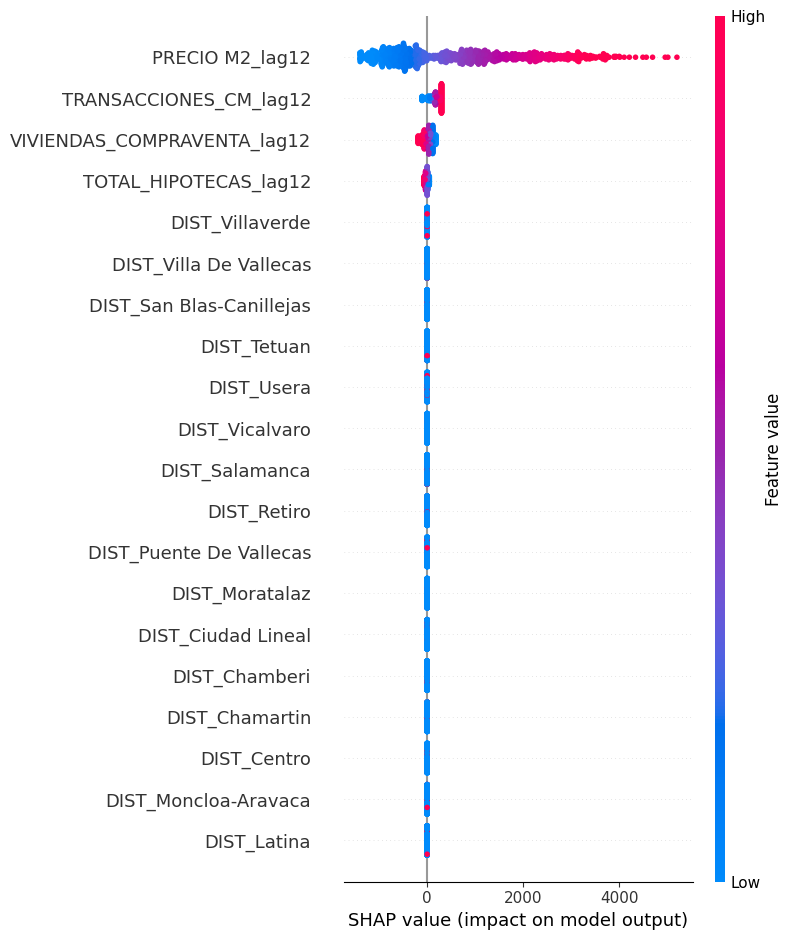

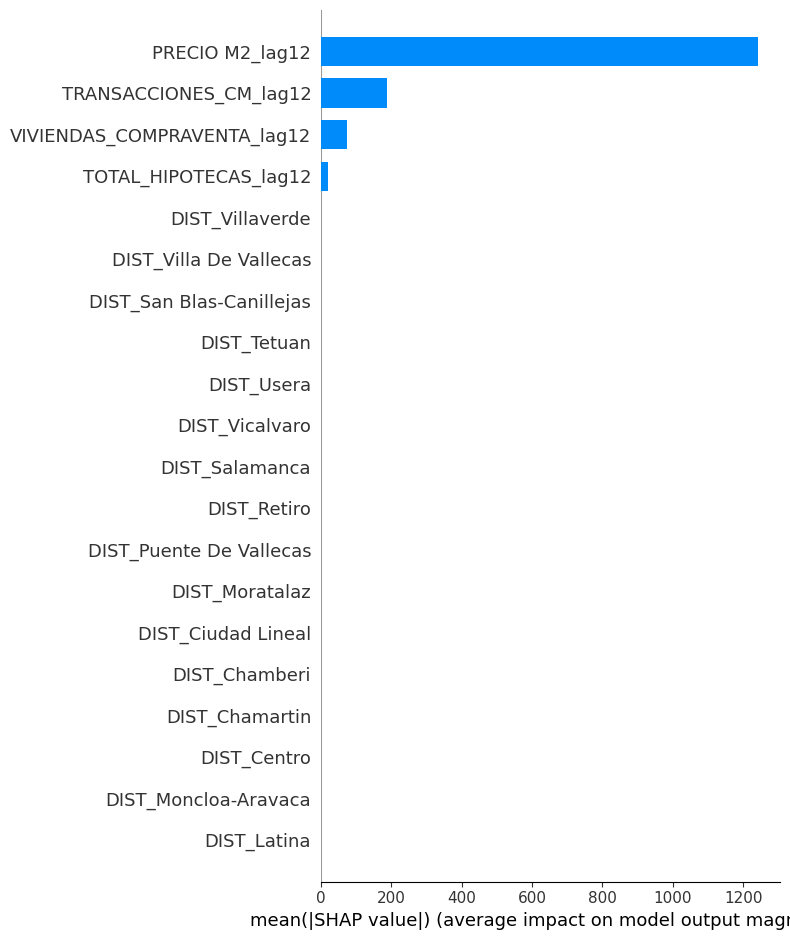

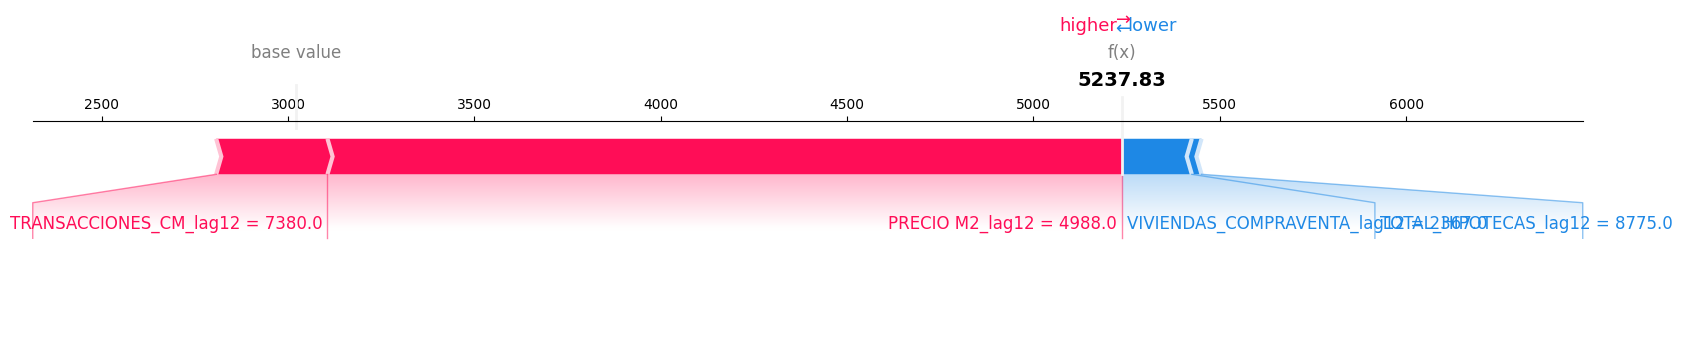

                    feature  mean_abs_shap
            PRECIO M2_lag12    1242.793847
     TRANSACCIONES_CM_lag12     186.370963
VIVIENDAS_COMPRAVENTA_lag12      73.447812
      TOTAL_HIPOTECAS_lag12      19.929274
                    LATITUD       0.000000
                   LONGITUD       0.000000
        INDICE_PRECIO_lag12       0.000000
      VARIACIÓN ANUAL_lag12       0.000000
              EURIBOR_lag12       0.000000
                 SHAPE_AREA       0.000000
 PRECIO_MEDIO_M2_CCMM_lag12       0.000000
       ESPERANZA_VIDA_lag12       0.000000
     POBLACION_ACTIVA_lag12       0.000000
            POBLACION_lag12       0.000000
                        AÑO       0.000000
                    MES_NUM       0.000000
  TRANSACCIONES_SUELO_lag12       0.000000
            DIST_Arganzuela       0.000000
               DIST_Barajas       0.000000
           DIST_Carabanchel       0.000000


In [30]:
# ========= SHAP para Pipeline( prep -> OMP ) =========
import numpy as np
import pandas as pd
import shap

# Usa el modelo que quieras explicar
#best_model = grid.best_estimator_
best_model = final_model_k
assert "prep" in best_model.named_steps and "omp" in best_model.named_steps, "best_model debe ser tu pipeline."

prep = best_model.named_steps["prep"]
omp  = best_model.named_steps["omp"]

# 1) Datos transformados y nombres de columnas después del preprocesado
Xtr_t = prep.transform(X_train)
Xte_t = prep.transform(X_test)

try:
    feat_names = prep.get_feature_names_out()
except Exception:
    feat_names = np.array([f"f{i}" for i in range(Xtr_t.shape[1])])

# (opcional) quitar el prefijo 'remainder__' 
feat_names = np.array([n.replace("remainder__", "") for n in feat_names])

# 2) Crear el explainer (funciona bien para modelos lineales como OMP)
# -- Para SHAP >= 0.45:
try:
    explainer = shap.LinearExplainer(omp, Xtr_t)   
    shap_values_tr = explainer.shap_values(Xtr_t)  
    shap_values_te = explainer.shap_values(Xte_t)
    expected_value = explainer.expected_value
except TypeError:
    explainer = shap.Explainer(omp, Xtr_t)
    sv_tr = explainer(Xtr_t)
    sv_te = explainer(Xte_t)
    shap_values_tr = sv_tr.values
    shap_values_te = sv_te.values
    expected_value = sv_te.base_values.mean()  

# 3) SHAP global: importancia media absoluta
shap.summary_plot(shap_values_te, Xte_t, feature_names=feat_names, show=True)
shap.summary_plot(shap_values_te, Xte_t, feature_names=feat_names, plot_type="bar", show=True)

# 4) SHAP local: una observación concreta del test
i = 0  
shap.force_plot(
    expected_value,
    shap_values_te[i],
    Xte_t[i],
    feature_names=feat_names,
    matplotlib=True
)

# 5) (Opcional) DataFrame ordenado con importancias globales
imp = (np.abs(shap_values_te).mean(axis=0))
shap_importance = (
    pd.DataFrame({"feature": feat_names, "mean_abs_shap": imp})
      .sort_values("mean_abs_shap", ascending=False, ignore_index=True)
)
print(shap_importance.head(20).to_string(index=False))

In [39]:
!pip install "numpy<=2.2" --upgrade


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------------------------- -------------- 8.1/12.9 MB 38.7 MB/s eta 0:00:01
   ---------------------------------------  12.8/12.9 MB 40.3 MB/s eta 0:00:01
   ---------------------------------------  12.8/12.9 MB 40.3 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 19.3 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


## 2. LIME

In [31]:
!pip install lime

In [32]:

from lime.lime_tabular import LimeTabularExplainer

# --- Modelo a explicar ---
best_model = final_model_k  # o grid.best_estimator_
assert hasattr(best_model, "predict"), "best_model debe ser tu pipeline entrenado."

# --- Features y datos de referencia (como DataFrame) ---
feature_names = X_train.columns.tolist()
X_train_df = X_train[feature_names]        

# --- Wrapper para que LIME pueda llamar al pipeline con arrays ---
def predict_pipeline(X_arr):
    # LIME pasa un np.array; lo convierte a DataFrame con mismas columnas
    if isinstance(X_arr, np.ndarray):
        X_df = pd.DataFrame(X_arr, columns=feature_names)
    else:
        X_df = pd.DataFrame(X_arr, columns=feature_names)
    return best_model.predict(X_df)

# --- Crear el explicador ---
explainer = LimeTabularExplainer(
    training_data=X_train_df,      
    feature_names=feature_names,
    mode="regression",
    verbose=True,
    discretize_continuous=False     
)

# --- Elegir instancia a explicar (puede ser de test o de df_prediccion) ---
i = 0  
x_instance = df_prediccion[feature_names].iloc[i]  

# --- Explicación LIME ---
exp = explainer.explain_instance(
    data_row=x_instance,           
    predict_fn=predict_pipeline,   
    num_features=10
)

# --- Mostrar resultados ---
print(exp.as_list())
fig = exp.as_pyplot_figure()

Intercept 3030.2085547443435
Prediction_local [5448.04658321]
Right: 5454.980665155858
[('PRECIO M2_lag12', 1063.529936177806), ('TRANSACCIONES_CM_lag12', 142.85774135848155), ('VIVIENDAS_COMPRAVENTA_lag12', -139.60723238261946), ('TOTAL_HIPOTECAS_lag12', -45.28536772307287), ('DIST_Arganzuela', 0.2560243831555043), ('POBLACION_lag12', 0.20283832250994005), ('POBLACION_ACTIVA_lag12', 0.1686505878924548), ('INDICE_PRECIO_lag12', 0.09223570651038265), ('VARIACIÓN ANUAL_lag12', 0.08876799343410947), ('AÑO', 0.062373409068340456)]


Intercept 3030.0538181356783
Prediction_local [5447.1881388]
Right: 5454.980665155858

Contribuciones LIME ordenadas:
                       feature       effect
0              PRECIO M2_lag12  1063.537867
1       TRANSACCIONES_CM_lag12   142.916968
2              DIST_Arganzuela     0.146846
3                          AÑO     0.144537
4       POBLACION_ACTIVA_lag12     0.137151
5          INDICE_PRECIO_lag12     0.125943
6         ESPERANZA_VIDA_lag12     0.114956
7                EURIBOR_lag12     0.052570
8        TOTAL_HIPOTECAS_lag12   -45.196991
9  VIVIENDAS_COMPRAVENTA_lag12  -139.592640


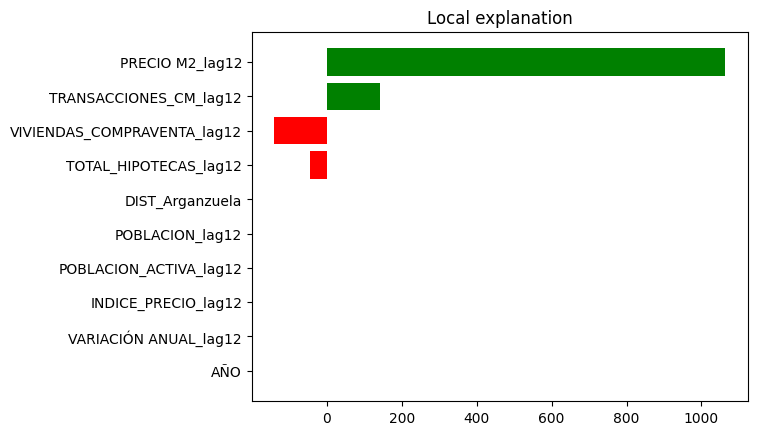

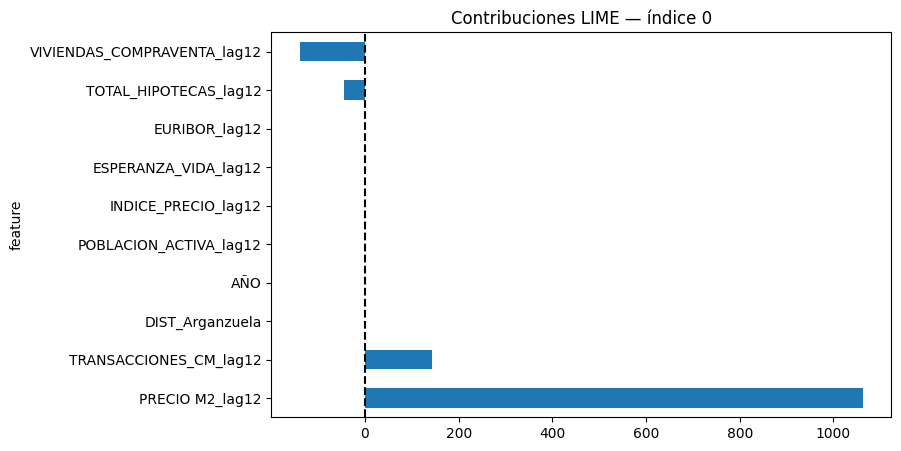

In [33]:
# --- Explicación LIME ---
exp = explainer.explain_instance(
    data_row=x_instance,
    predict_fn=predict_pipeline,
    num_features=10
)

# --- Convertir a DataFrame ordenado ---
lime_df = pd.DataFrame(exp.as_list(), columns=["feature", "effect"])
lime_df = lime_df.sort_values("effect", ascending=False).reset_index(drop=True)

print("\nContribuciones LIME ordenadas:")
print(lime_df)

# --- Opcional: gráfico de barras horizontal ---
import matplotlib.pyplot as plt

lime_df.plot.barh(x="feature", y="effect", legend=False, figsize=(8,5))
plt.axvline(0, color="k", linestyle="--")
plt.title(f"Contribuciones LIME — índice {i}")
plt.show()



=== LIME para fila índice 247 ===
Predicción del modelo: 2,430.9755
Contribuciones (feature, efecto):
  - PRECIO M2_lag12: 1,064.4531
  - TRANSACCIONES_CM_lag12: 142.7550
  - VIVIENDAS_COMPRAVENTA_lag12: -139.6207
  - TOTAL_HIPOTECAS_lag12: -45.2173
  - AÑO: 0.1122
  - LATITUD: 0.0982
  - MES_NUM: 0.0509
  - EURIBOR_lag12: -0.0376
  - INDICE_PRECIO_lag12: 0.0286
  - DIST_Villaverde: 0.0178


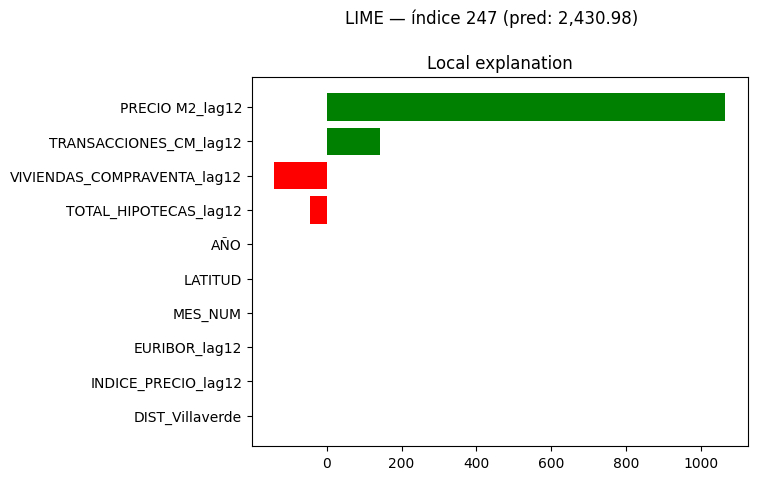


=== LIME para fila índice 248 ===
Predicción del modelo: 2,488.7477
Contribuciones (feature, efecto):
  - PRECIO M2_lag12: 1,064.2860
  - TRANSACCIONES_CM_lag12: 142.8357
  - VIVIENDAS_COMPRAVENTA_lag12: -139.5703
  - TOTAL_HIPOTECAS_lag12: -45.2556
  - POBLACION_ACTIVA_lag12: -0.1200
  - VARIACIÓN ANUAL_lag12: 0.1139
  - LONGITUD: -0.0654
  - LATITUD: -0.0284
  - INDICE_PRECIO_lag12: 0.0279
  - DIST_Villaverde: 0.0251


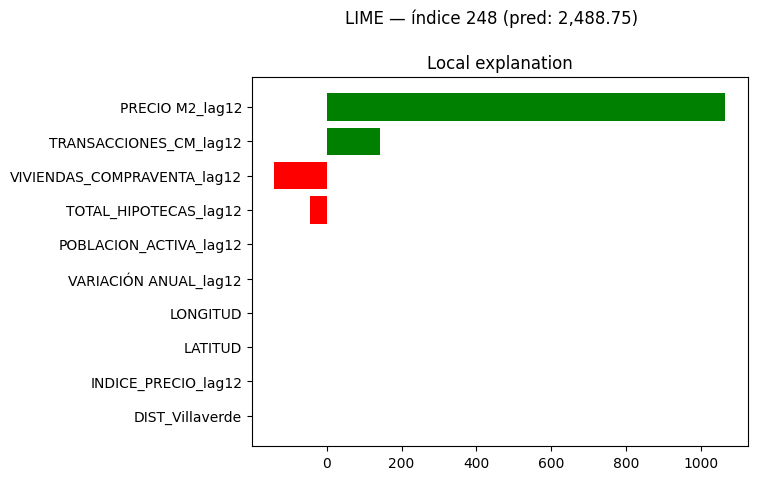


=== LIME para fila índice 249 ===
Predicción del modelo: 2,548.0046
Contribuciones (feature, efecto):
  - PRECIO M2_lag12: 1,065.3463
  - TRANSACCIONES_CM_lag12: 142.9654
  - VIVIENDAS_COMPRAVENTA_lag12: -139.7736
  - TOTAL_HIPOTECAS_lag12: -45.3152
  - PRECIO_MEDIO_M2_CCMM_lag12: 0.0646
  - LONGITUD: -0.0531
  - EURIBOR_lag12: -0.0427
  - DIST_Villaverde: 0.0313
  - VARIACIÓN ANUAL_lag12: -0.0311
  - POBLACION_ACTIVA_lag12: 0.0301


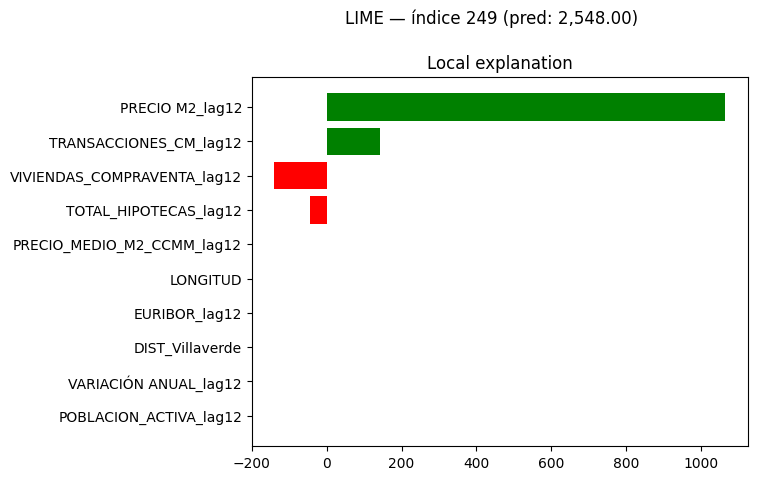


=== LIME para fila índice 250 ===
Predicción del modelo: 2,548.0046
Contribuciones (feature, efecto):
  - PRECIO M2_lag12: 1,065.4329
  - TRANSACCIONES_CM_lag12: 142.9603
  - VIVIENDAS_COMPRAVENTA_lag12: -139.7645
  - TOTAL_HIPOTECAS_lag12: -45.3091
  - DIST_Ciudad Lineal: 0.0903
  - DIST_Villaverde: 0.0385
  - AÑO: -0.0376
  - POBLACION_ACTIVA_lag12: -0.0375
  - LATITUD: -0.0361
  - VARIACIÓN ANUAL_lag12: -0.0199


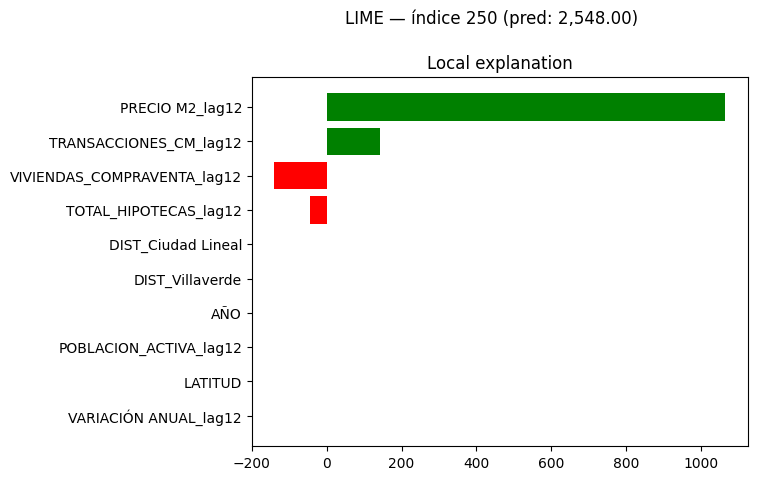


=== LIME para fila índice 251 ===
Predicción del modelo: 2,548.0046
Contribuciones (feature, efecto):
  - PRECIO M2_lag12: 1,065.2747
  - TRANSACCIONES_CM_lag12: 142.8677
  - VIVIENDAS_COMPRAVENTA_lag12: -139.7907
  - TOTAL_HIPOTECAS_lag12: -45.2611
  - LONGITUD: 0.0649
  - POBLACION_ACTIVA_lag12: -0.0574
  - VARIACIÓN ANUAL_lag12: 0.0550
  - LATITUD: 0.0358
  - DIST_Villaverde: 0.0210
  - AÑO: 0.0170


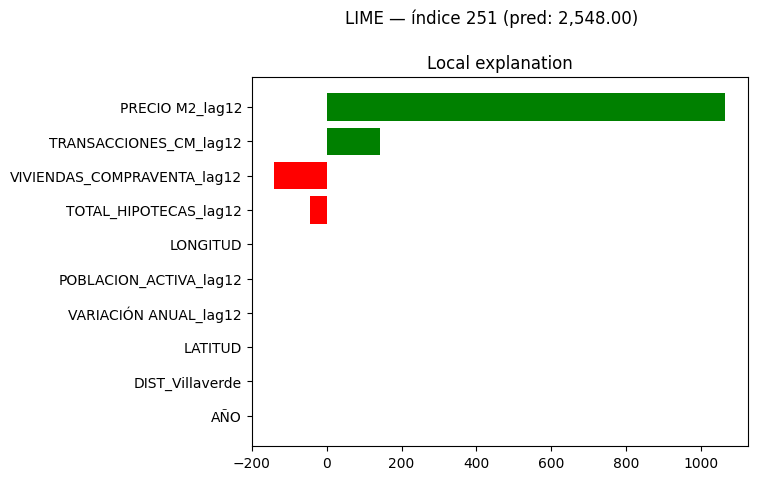

In [34]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# --- Modelo a explicar ---
# Usa el que quieras:
# best_model = final_model_k     # producción
# best_model = grid.best_estimator_
assert hasattr(best_model, "predict"), "best_model debe ser tu pipeline entrenado (prep + modelo)."

# --- Nombres y orden de features (igual que en entrenamiento) ---
feature_names = X_train.columns.tolist()

# --- Helper: LIME pasará arrays; conviértelos a DataFrame con mismas columnas ---
def _to_frame(X_arr):
    X_arr = np.asarray(X_arr)
    if X_arr.ndim == 1:
        X_arr = X_arr.reshape(1, -1)
    return pd.DataFrame(X_arr, columns=feature_names)

def predict_pipeline(X_arr):
    return best_model.predict(_to_frame(X_arr))

# --- Explainer: usa X_train como background ---
explainer = LimeTabularExplainer(
    training_data=X_train[feature_names].values,  
    feature_names=feature_names,
    mode="regression",
    discretize_continuous=False,   
    verbose=False
)

# --- Seleccionar las últimas 5 filas de df_prediccion (o menos si no hay tantas) ---
ultimos = df_prediccion.tail(5) if len(df_prediccion) >= 5 else df_prediccion.copy()

for idx in ultimos.index:
    x_series = df_prediccion.loc[idx, feature_names]         
    y_hat = best_model.predict(x_series.to_frame().T)[0]     

    exp = explainer.explain_instance(
        data_row=x_series.values,     
        predict_fn=predict_pipeline,
        num_features=10
    )

    print(f"\n=== LIME para fila índice {idx} ===")
    print(f"Predicción del modelo: {y_hat:,.4f}")
    print("Contribuciones (feature, efecto):")
    for feat, w in exp.as_list():
        print(f"  - {feat}: {w:,.4f}")

    # gráfico
    fig = exp.as_pyplot_figure()
    fig.suptitle(f"LIME — índice {idx} (pred: {y_hat:,.2f})", y=1.02)
    plt.show()


In [36]:
# Ver los índices completos
print(X_train.index)
print(X_test.index)
print(df_prediccion.index)


RangeIndex(start=0, stop=3332, step=1)
RangeIndex(start=3332, stop=4166, step=1)
RangeIndex(start=0, stop=252, step=1)
